# BTC Analisis:

### Este archivo:

#### Busca pronosticar las variables del bitcoin en el tiempo. utiliza api https://www.coingecko.com/en/api/documentation, para obtener info de la criptomoneda seleccionada.


### El market_caps:

O "capitalización de mercado" es un término utilizado en el ámbito de las criptomonedas y se refiere al valor total de mercado de una criptomoneda específica en un momento dado. Representa la suma de todos los tokens o monedas de una criptomoneda en circulación multiplicado por el precio actual de cada token.

La capitalización de mercado es una medida importante que se utiliza para evaluar el tamaño y la popularidad de una criptomoneda en comparación con otras. Una capitalización de mercado más alta generalmente indica que una criptomoneda tiene una mayor adopción y valoración en el mercado.

Es importante tener en cuenta que la capitalización de mercado puede fluctuar ampliamente debido a los cambios en el precio de la criptomoneda y en la cantidad de tokens en circulación. También es importante considerar otros factores y métricas al evaluar una criptomoneda, como el volumen de operaciones, la liquidez, la tecnología subyacente y el equipo de desarrollo.

En el contexto del código que proporcionaste, "market_caps" se refiere a los datos de capitalización de mercado históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin.

### Total volumes:

O "volúmenes totales" se refiere al volumen total de transacciones realizadas con una criptomoneda específica en un momento dado. Representa la suma de todos los volúmenes de transacciones en la criptomoneda durante un período de tiempo determinado.

El volumen de transacciones es una métrica importante en el mercado de las criptomonedas, ya que proporciona información sobre la liquidez y la actividad de negociación de una criptomoneda. Un mayor volumen de transacciones generalmente indica una mayor actividad comercial y una mayor liquidez en el mercado, lo que puede ser un indicador de interés y confianza en la criptomoneda.

Es importante tener en cuenta que el volumen de transacciones puede variar ampliamente de un momento a otro y puede influir en la volatilidad de los precios de las criptomonedas. Un alto volumen de transacciones puede indicar una mayor actividad especulativa y comercial, mientras que un bajo volumen puede indicar menor interés o actividad en el mercado.

En el contexto del código que proporcionaste, "total_volumes" se refiere a los datos de volúmenes totales históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin, incluido el volumen total de transacciones.

________________________________________________________

# Api conection to data:

### Monthly data, here we have 1 record per day of the variables

In [235]:
import pandas as pd
import requests

bitcoin_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&precision=full"
bitcoin_response = requests.get(bitcoin_url)
bitcoin_data = bitcoin_response.json()

# Extraer los valores de timestamp de cada lista en la columna 'timestamp'
timestamps = [item[0] for item in bitcoin_data['prices']]

# Crear el dataframe con los datos históricos de Bitcoin
df_bit = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='ms'),
    'prices': [item[1] for item in bitcoin_data['prices']],
    'market_caps': [item[1] for item in bitcoin_data['market_caps']],
    'total_volumes': [item[1] for item in bitcoin_data['total_volumes']]
})

# Mostrar las últimas 50 filas del dataframe
print(df_bit.head(50))
print(df_bit.tail(50))

    timestamp    prices   market_caps  total_volumes
0  2013-04-28  135.3000  1.500518e+09            0.0
1  2013-04-29  141.9600  1.575032e+09            0.0
2  2013-04-30  135.3000  1.501657e+09            0.0
3  2013-05-01  117.0000  1.298952e+09            0.0
4  2013-05-02  103.4300  1.148668e+09            0.0
5  2013-05-03   91.0100  1.011066e+09            0.0
6  2013-05-04  111.2500  1.236352e+09            0.0
7  2013-05-05  116.7900  1.298378e+09            0.0
8  2013-05-06  118.3300  1.315992e+09            0.0
9  2013-05-07  106.4000  1.183766e+09            0.0
10 2013-05-08  112.6400  1.253655e+09            0.0
11 2013-05-09  113.0000  1.258131e+09            0.0
12 2013-05-10  118.7800  1.322989e+09            0.0
13 2013-05-11  113.0100  1.259239e+09            0.0
14 2013-05-12  114.7130  1.278709e+09            0.0
15 2013-05-13  117.1800  1.306721e+09            0.0
16 2013-05-14  114.5000  1.277279e+09            0.0
17 2013-05-15  114.1560  1.273850e+09         

In [236]:
# Ordenamos los datos, por posibles desordenes internos
df_bit = df_bit.sort_values(by='timestamp').reset_index(drop=True)
df_bit.head()
# Ahora df_sorted contendrá el DataFrame ordenado por la columna "timestamp" en orden ascendente


timestamp  prices   market_caps  total_volumes
0 2013-04-28  135.30  1.500518e+09            0.0
1 2013-04-29  141.96  1.575032e+09            0.0
2 2013-04-30  135.30  1.501657e+09            0.0
3 2013-05-01  117.00  1.298952e+09            0.0
4 2013-05-02  103.43  1.148668e+09            0.0

In [237]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3733 entries, 0 to 3732
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      3733 non-null   datetime64[ns]
 1   prices         3733 non-null   float64       
 2   market_caps    3732 non-null   float64       
 3   total_volumes  3733 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 116.8 KB


In [238]:
df_bit.isnull().sum()

timestamp        0
prices           0
market_caps      1
total_volumes    0
dtype: int64

In [239]:
df_bit = df_bit.dropna()

In [240]:
df_bit.drop_duplicates()

timestamp        prices   market_caps  total_volumes
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00
...                  ...           ...           ...            ...
3728 2023-07-15 00:00:00  30311.827808  5.881074e+11   2.197715e+10
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10
3732 2023-07-18 18:57:54  29892.172223  5.810628e+11   1.399250e+10

[3732 rows x 4 columns]

In [241]:
df_bit.describe()

timestamp        prices   market_caps  \
count                           3732   3732.000000  3.732000e+03   
mean   2018-06-08 22:26:55.079940352  11885.145538  2.207411e+11   
min              2013-04-28 00:00:00     67.809000  7.713681e+08   
25%              2015-11-18 18:00:00    567.348296  7.303965e+09   
50%              2018-06-09 12:00:00   6323.480991  1.091581e+11   
75%              2020-12-28 06:00:00  17102.404802  3.251682e+11   
max              2023-07-18 18:57:54  67617.015545  1.278798e+12   
std                              NaN  15584.211643  2.953263e+11   

       total_volumes  
count   3.732000e+03  
mean    1.413584e+10  
min     0.000000e+00  
25%     1.305524e+08  
50%     3.553782e+09  
75%     2.429303e+10  
max     1.788941e+11  
std     1.844197e+10

In [242]:
import seaborn as sns

In [243]:
# sns.pairplot(df_bit)

### Fin de la revision de los datos.

____________________________________________________________________________________________________________________________________________________

# Transpuesta

In [244]:
df_bit_t = df_bit.T

In [245]:
df_bit_t

0                    1                    2     \
timestamp      2013-04-28 00:00:00  2013-04-29 00:00:00  2013-04-30 00:00:00   
prices                       135.3               141.96                135.3   
market_caps           1500517590.0         1575032004.0         1501657493.0   
total_volumes                  0.0                  0.0                  0.0   

                              3                    4                    5     \
timestamp      2013-05-01 00:00:00  2013-05-02 00:00:00  2013-05-03 00:00:00   
prices                       117.0               103.43                91.01   
market_caps           1298951550.0         1148667722.0         1011066494.0   
total_volumes                  0.0                  0.0                  0.0   

                              6                    7                    8     \
timestamp      2013-05-04 00:00:00  2013-05-05 00:00:00  2013-05-06 00:00:00   
prices                      111.25               116.79               118.33   
market_caps           1236351844.0         1298377788.0         1315992304.0   
total_volumes                  0.0                  0.0                  0.0   

                              9     ...                 3723  \
timestamp      2013-05-07 00:00:00  ...  2023-07-10 00:00:00   
prices                       106.4  ...         30169.870657   
market_caps           1183766500.0  ...  585883986681.171143   
total_volumes                  0.0  ...    7559670230.189486   

                              3724                 3725                 3726  \
timestamp      2023-07-11 00:00:00  2023-07-12 00:00:00  2023-07-13 00:00:00   
prices                30394.281146         30620.814247         30407.416314   
market_caps    590311894648.751831  594749192359.135132  590629381260.711426   
total_volumes   12835219756.965891   11753418050.421658   13072555444.262321   

                              3727                 3728                 3729  \
timestamp      2023-07-14 00:00:00  2023-07-15 00:00:00  2023-07-16 00:00:00   
prices                31446.014971         30311.827808           30297.9714   
market_caps    610725509598.846436   588107447250.13269  588642134563.520386   
total_volumes   21254274345.702217   21977151420.853252    6233916918.782722   

                              3730                 3731                 3732  
timestamp      2023-07-17 00:00:00  2023-07-18 00:00:00  2023-07-18 18:57:54  
prices                30237.334785         30147.860079         29892.172223  
market_caps    586391434733.715332  585500720965.111328  581062807716.689575  
total_volumes    8356410453.563714   10974383371.546566   13992496703.083591  

[4 rows x 3732 columns]

In [246]:
# Almacenar los índices en una variable
indices = df_bit_t.index

In [247]:
# Almacenar los nombres de las filas en una variable
df_bit_t_row_names = df_bit_t.index

# Eliminar los nombres de las filas del índice del DataFrame
df_bit_t.reset_index(drop=True, inplace=True)

# Imprimir los nombres de las filas
print(df_bit_t_row_names)

Index(['timestamp', 'prices', 'market_caps', 'total_volumes'], dtype='object')


In [248]:
df_bit_t

0                    1                    2     \
0  2013-04-28 00:00:00  2013-04-29 00:00:00  2013-04-30 00:00:00   
1                135.3               141.96                135.3   
2         1500517590.0         1575032004.0         1501657493.0   
3                  0.0                  0.0                  0.0   

                  3                    4                    5     \
0  2013-05-01 00:00:00  2013-05-02 00:00:00  2013-05-03 00:00:00   
1                117.0               103.43                91.01   
2         1298951550.0         1148667722.0         1011066494.0   
3                  0.0                  0.0                  0.0   

                  6                    7                    8     \
0  2013-05-04 00:00:00  2013-05-05 00:00:00  2013-05-06 00:00:00   
1               111.25               116.79               118.33   
2         1236351844.0         1298377788.0         1315992304.0   
3                  0.0                  0.0                  0.0   

                  9     ...                 3723                 3724  \
0  2013-05-07 00:00:00  ...  2023-07-10 00:00:00  2023-07-11 00:00:00   
1                106.4  ...         30169.870657         30394.281146   
2         1183766500.0  ...  585883986681.171143  590311894648.751831   
3                  0.0  ...    7559670230.189486   12835219756.965891   

                  3725                 3726                 3727  \
0  2023-07-12 00:00:00  2023-07-13 00:00:00  2023-07-14 00:00:00   
1         30620.814247         30407.416314         31446.014971   
2  594749192359.135132  590629381260.711426  610725509598.846436   
3   11753418050.421658   13072555444.262321   21254274345.702217   

                  3728                 3729                 3730  \
0  2023-07-15 00:00:00  2023-07-16 00:00:00  2023-07-17 00:00:00   
1         30311.827808           30297.9714         30237.334785   
2   588107447250.13269  588642134563.520386  586391434733.715332   
3   21977151420.853252    6233916918.782722    8356410453.563714   

                  3731                 3732  
0  2023-07-18 00:00:00  2023-07-18 18:57:54  
1         30147.860079         29892.172223  
2  585500720965.111328  581062807716.689575  
3   10974383371.546566   13992496703.083591  

[4 rows x 3732 columns]

In [249]:
# Almacenar la primera fila en una variable
primera_fila = df_bit_t.iloc[0]

# Eliminar la primera fila del DataFrame
df_bit_t = df_bit_t.iloc[1:]

print(primera_fila)

0       2013-04-28 00:00:00
1       2013-04-29 00:00:00
2       2013-04-30 00:00:00
3       2013-05-01 00:00:00
4       2013-05-02 00:00:00
               ...         
3728    2023-07-15 00:00:00
3729    2023-07-16 00:00:00
3730    2023-07-17 00:00:00
3731    2023-07-18 00:00:00
3732    2023-07-18 18:57:54
Name: 0, Length: 3732, dtype: object


In [250]:
df_bit_t

0             1             2             3             4     \
1         135.3        141.96         135.3         117.0        103.43   
2  1500517590.0  1575032004.0  1501657493.0  1298951550.0  1148667722.0   
3           0.0           0.0           0.0           0.0           0.0   

           5             6             7             8             9     ...  \
1         91.01        111.25        116.79        118.33         106.4  ...   
2  1011066494.0  1236351844.0  1298377788.0  1315992304.0  1183766500.0  ...   
3           0.0           0.0           0.0           0.0           0.0  ...   

                  3723                 3724                 3725  \
1         30169.870657         30394.281146         30620.814247   
2  585883986681.171143  590311894648.751831  594749192359.135132   
3    7559670230.189486   12835219756.965891   11753418050.421658   

                  3726                 3727                3728  \
1         30407.416314         31446.014971        30311.827808   
2  590629381260.711426  610725509598.846436  588107447250.13269   
3   13072555444.262321   21254274345.702217  21977151420.853252   

                  3729                 3730                 3731  \
1           30297.9714         30237.334785         30147.860079   
2  588642134563.520386  586391434733.715332  585500720965.111328   
3    6233916918.782722    8356410453.563714   10974383371.546566   

                  3732  
1         29892.172223  
2  581062807716.689575  
3   13992496703.083591  

[3 rows x 3732 columns]

_____________________________________________

# 2.0 Regresión Lineal: codigo anterior.. 

In [251]:
import pandas as pd
from sklearn.linear_model import LinearRegression


In [318]:
# Opcion 2: - CONECTADA - OK
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

# Filtrar los últimos 45 días
last_45_days = df_bit[-253:].copy()

# Convertir la columna 'timestamp' al formato de fecha y hora
last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# Dividir los datos en características (X) y variable objetivo (y)
X = last_45_days[['days']]
y_prices = last_45_days['prices']
y_market_caps = last_45_days['market_caps']
y_total_volumes = last_45_days['total_volumes']

#___________________________________________________________________________________________________________
# # Normalizar las características (X)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_prices_train, y_prices_test, y_market_caps_train, y_market_caps_test, y_total_volumes_train, y_total_volumes_test = train_test_split(X, y_prices, y_market_caps, y_total_volumes, test_size=0.3, random_state=42)

# Crear un modelo de regresión lineal para cada variable
model_prices = LinearRegression()
model_market_caps = LinearRegression()
model_total_volumes = LinearRegression()

# Ajustar los modelos a los datos de entrenamiento
model_prices.fit(X_train, y_prices_train)
model_market_caps.fit(X_train, y_market_caps_train)
model_total_volumes.fit(X_train, y_total_volumes_train)

# Realizar predicciones para los datos de prueba
y_prices_pred = model_prices.predict(X_test)
y_market_caps_pred = model_market_caps.predict(X_test)
y_total_volumes_pred = model_total_volumes.predict(X_test)

# Calcular métricas de rendimiento para cada modelo
mse_prices = mean_squared_error(y_prices_test, y_prices_pred)
mse_market_caps = mean_squared_error(y_market_caps_test, y_market_caps_pred)
mse_total_volumes = mean_squared_error(y_total_volumes_test, y_total_volumes_pred)

r2_prices = r2_score(y_prices_test, y_prices_pred)
r2_market_caps = r2_score(y_market_caps_test, y_market_caps_pred)
r2_total_volumes = r2_score(y_total_volumes_test, y_total_volumes_pred)

print("MSE for prices:", mse_prices)
print("MSE for market_caps:", mse_market_caps)
print("MSE for total_volumes:", mse_total_volumes)

print("R-squared for prices:", r2_prices)
print("R-squared for market_caps:", r2_market_caps)
print("R-squared for total_volumes:", r2_total_volumes)


#___________________________________________________________________________________________________________

# Generar valores futuros de días para los próximos 30 días
future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 31)})

# Realizar predicciones de precios, market_caps y total_volumes para los próximos 30 días
future_prices = model_prices.predict(future_days)
future_market_caps = model_market_caps.predict(future_days)
future_total_volumes = model_total_volumes.predict(future_days)

# Calcular desviaciones estándar para cada variable
std_prices = 2229.815617/6
std_market_caps = 4.379837e+10/6
std_total_volumes = 3.940256e+09

# Generar ruido gaussiano para cada variable
noise_prices = np.random.normal(0, std_prices, len(future_prices))
noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# Agregar ruido a los valores pronosticados
future_prices += noise_prices
future_market_caps += noise_market_caps
future_total_volumes += noise_total_volumes

# Crear un DataFrame con los valores proyectados y con ruido
projected_data_with_noise = pd.DataFrame({
    'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(), periods=30, freq='D'),
    'prices': future_prices,
    'market_caps': future_market_caps,
    'total_volumes': future_total_volumes
})

# Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
projected_df = pd.concat([last_45_days, projected_data_with_noise])

# Restablecer los índices
projected_df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
print(projected_df)


MSE for prices: 3768096.5040306277
MSE for market_caps: 1.401924426011889e+21
MSE for total_volumes: 1.4130011504569629e+20
R-squared for prices: 0.8251509606932653
R-squared for market_caps: 0.8309224996393435
R-squared for total_volumes: 0.2042164471777984
              timestamp        prices   market_caps  total_volumes  days
0   2022-11-09 00:00:00  18562.353215  3.568716e+11   9.214496e+10   0.0
1   2022-11-10 00:00:00  15742.444336  3.019638e+11   7.497868e+10   1.0
2   2022-11-11 00:00:00  17594.923500  3.365972e+11   6.520067e+10   2.0
3   2022-11-12 00:00:00  17080.215261  3.259211e+11   4.503033e+10   3.0
4   2022-11-13 00:00:00  16797.987483  3.223306e+11   2.189400e+10   4.0
..                  ...           ...           ...            ...   ...
278 2023-08-13 18:57:54  34172.649751  6.450808e+11   1.571450e+10   NaN
279 2023-08-14 18:57:54  33420.853136  6.555500e+11   1.236592e+10   NaN
280 2023-08-15 18:57:54  33190.318083  6.520625e+11   5.751168e+09   NaN
281 2023-08

In [319]:
X

days
3480     0
3481     1
3482     2
3483     3
3484     4
...    ...
3728   248
3729   249
3730   250
3731   251
3732   251

[253 rows x 1 columns]

In [320]:
projected_df.describe()

timestamp        prices   market_caps  \
count                            283    283.000000  2.830000e+02   
mean   2023-03-29 23:26:54.466430976  24942.356692  4.822824e+11   
min              2022-11-09 00:00:00  15742.444336  3.019638e+11   
25%              2023-01-18 12:00:00  20790.037769  4.005235e+11   
50%              2023-03-30 00:00:00  26475.607903  5.132957e+11   
75%              2023-06-08 12:00:00  29278.969522  5.669341e+11   
max              2023-08-17 18:57:54  34172.649751  6.699326e+11   
std                              NaN   5451.698761  1.067464e+11   

       total_volumes        days  
count   2.830000e+02  253.000000  
mean    2.172042e+10  125.996047  
min     3.882362e+09    0.000000  
25%     1.204503e+10   63.000000  
50%     1.769910e+10  126.000000  
75%     2.645864e+10  189.000000  
max     9.214496e+10  251.000000  
std     1.386065e+10   73.172198

In [321]:
import pandas as pd

# Suponiendo que ya tienes los datos en el DataFrame llamado projected_df

# Rellenamos los valores faltantes en la columna 'days' con una enumeración incremental
projected_df['days'] = range(len(projected_df))

# Mostramos el DataFrame actualizado
print(projected_df)


              timestamp        prices   market_caps  total_volumes  days
0   2022-11-09 00:00:00  18562.353215  3.568716e+11   9.214496e+10     0
1   2022-11-10 00:00:00  15742.444336  3.019638e+11   7.497868e+10     1
2   2022-11-11 00:00:00  17594.923500  3.365972e+11   6.520067e+10     2
3   2022-11-12 00:00:00  17080.215261  3.259211e+11   4.503033e+10     3
4   2022-11-13 00:00:00  16797.987483  3.223306e+11   2.189400e+10     4
..                  ...           ...           ...            ...   ...
278 2023-08-13 18:57:54  34172.649751  6.450808e+11   1.571450e+10   278
279 2023-08-14 18:57:54  33420.853136  6.555500e+11   1.236592e+10   279
280 2023-08-15 18:57:54  33190.318083  6.520625e+11   5.751168e+09   280
281 2023-08-16 18:57:54  33385.359997  6.511292e+11   7.828976e+09   281
282 2023-08-17 18:57:54  33168.447182  6.699326e+11   7.338223e+09   282

[283 rows x 5 columns]


In [322]:
projected_df.tail(10)

timestamp        prices   market_caps  total_volumes  days
273 2023-08-08 18:57:54  33472.468514  6.527375e+11   1.376212e+10   273
274 2023-08-09 18:57:54  32851.131765  6.448282e+11   6.133338e+09   274
275 2023-08-10 18:57:54  33647.947472  6.554738e+11   6.942092e+09   275
276 2023-08-11 18:57:54  33855.621760  6.491729e+11   1.355642e+10   276
277 2023-08-12 18:57:54  33343.984062  6.521873e+11   1.307928e+10   277
278 2023-08-13 18:57:54  34172.649751  6.450808e+11   1.571450e+10   278
279 2023-08-14 18:57:54  33420.853136  6.555500e+11   1.236592e+10   279
280 2023-08-15 18:57:54  33190.318083  6.520625e+11   5.751168e+09   280
281 2023-08-16 18:57:54  33385.359997  6.511292e+11   7.828976e+09   281
282 2023-08-17 18:57:54  33168.447182  6.699326e+11   7.338223e+09   282

_____________________________________________

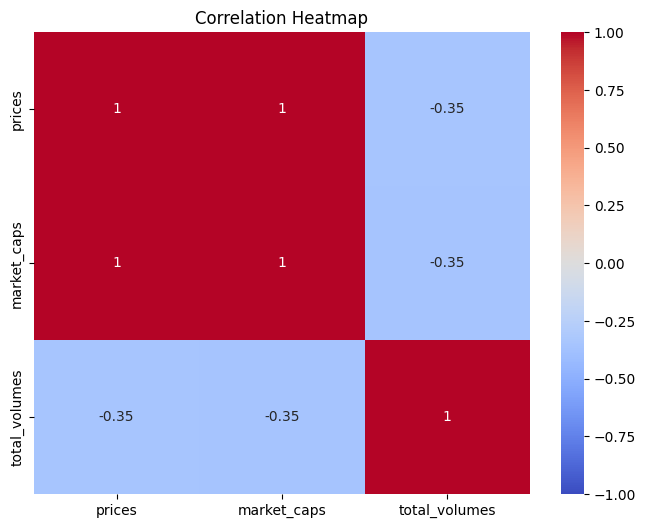

                 prices  market_caps  total_volumes
prices         1.000000     0.999404      -0.348243
market_caps    0.999404     1.000000      -0.352478
total_volumes -0.348243    -0.352478       1.000000


In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el subconjunto de datos que contiene las columnas de interés
subset_df = projected_df[['prices', 'market_caps', 'total_volumes']]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


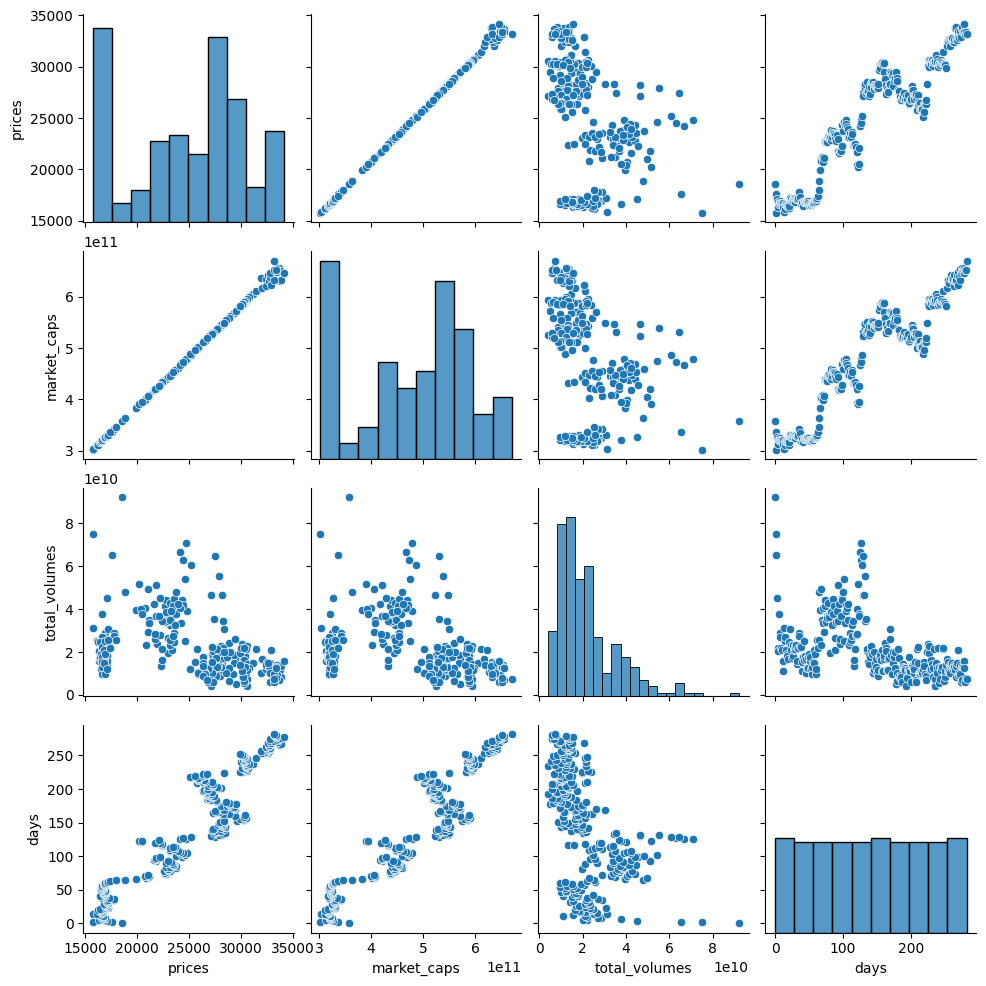

In [324]:
sns.pairplot(projected_df)

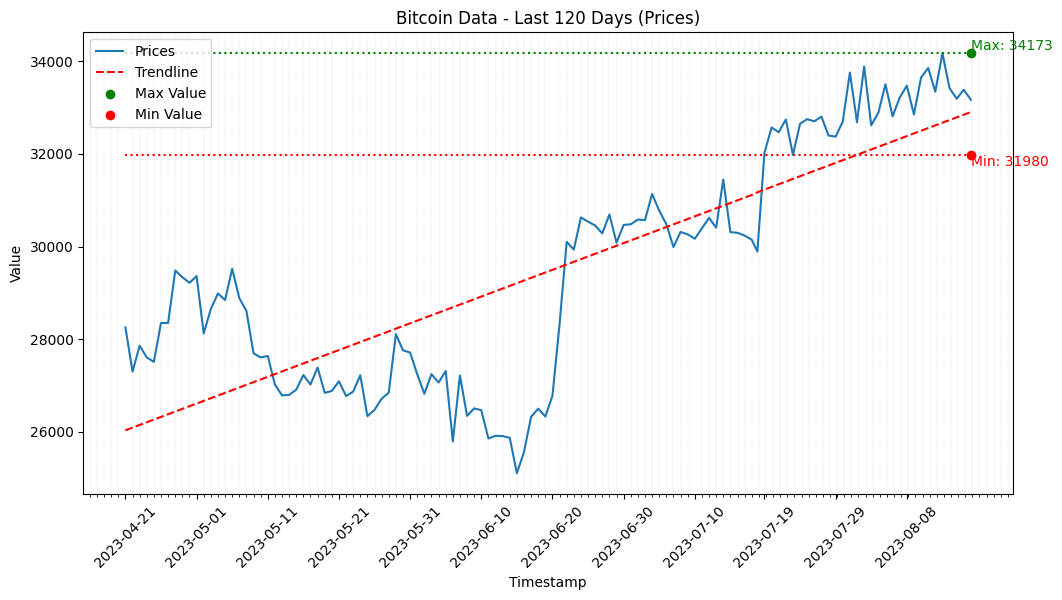

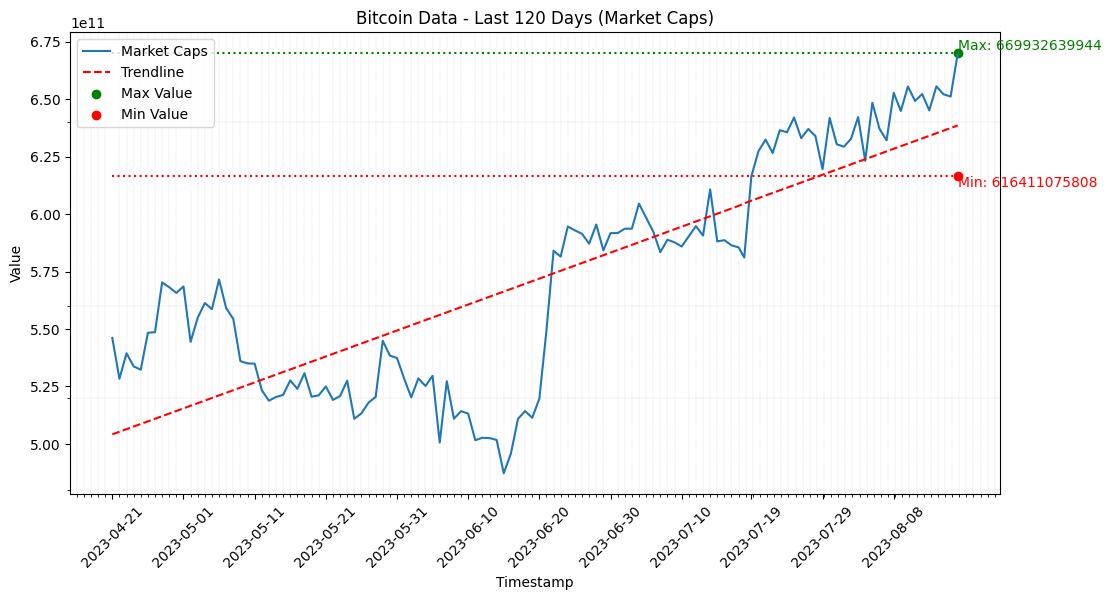

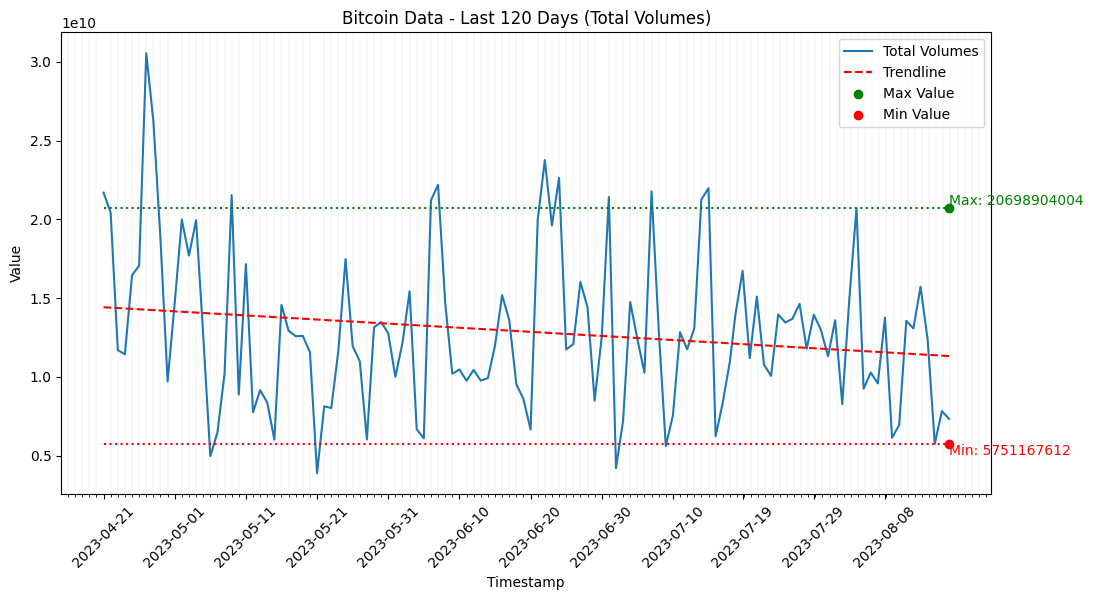

In [325]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = projected_df.tail(120)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de precios
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()

# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de market_caps
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de market_caps
plt.show()

# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de total_volumes
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de total_volumes
plt.show()


# Fundamental agregar un punto que represente hoy en el grafo de abajo

_____________________________________________

# 2. Regresión lineal múltiple


In [177]:
import numpy as np

In [178]:
X = df_bit[['timestamp','market_caps','total_volumes']]
y = df_bit['prices']

In [179]:
X.tail(3)


timestamp   market_caps  total_volumes
3730 2023-07-17 00:00:00  5.863914e+11   8.356410e+09
3731 2023-07-18 00:00:00  5.855007e+11   1.097438e+10
3732 2023-07-18 18:57:54  5.810628e+11   1.399250e+10

In [180]:
y.tail(3)

3730    30237.334785
3731    30147.860079
3732    29892.172223
Name: prices, dtype: float64

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2612, 3) (2612,) (1120, 3) (1120,)


In [183]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


# Assuming X and y are defined correctly as pandas DataFrames or numpy arrays

# Exclude the 'Timestamp' column from X_train
X_train = X_train.drop('timestamp', axis=1)  # Assuming X_train is a DataFrame
# X_train = X_train[:, 1:]  # Assuming X_train is a numpy array

# Convert X_train and y_train to numpy arrays and ensure they have a numeric data type
X_train = np.array(X_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)

# Check the shapes and data types of X_train and y_train
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

# Instantiate the linear regression model and train it
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get the coefficients and intercept
print('The coefficients of the linear regression model are:', linear_model.coef_)
print('The intercept of the linear regression model is:', linear_model.intercept_)


(2612, 2) float64
(2612,) float64
The coefficients of the linear regression model are: [5.25965811e-08 3.26927666e-09]
The intercept of the linear regression model is: 231.4219173305737


In [184]:
X_train

array([[5.77136871e+09, 8.14090888e+08],
       [3.72892085e+11, 4.74942582e+10],
       [3.08042969e+09, 9.91664692e+07],
       ...,
       [1.29185013e+11, 1.53123005e+09],
       [7.23434797e+11, 5.38025590e+10],
       [4.49775317e+10, 5.32874223e+08]])

In [185]:
# Assuming you have a DataFrame or numpy array for the new data called 'X_test'
# If using a DataFrame:
X_test = X_test.drop('timestamp', axis=1)  # Drop the 'timestamp' column, assuming it exists in the test data

# Convert X_test to a numpy array and ensure it has a numeric data type
X_test = np.array(X_test, dtype=np.float64)

# Make predictions on the new data using the trained linear regression model
predictions = linear_model.predict(X_test)

# 'predictions' will contain the predicted values for the new data

# If you have the true target values for the test data (ground truth), you can also evaluate the model's performance:
# Assuming 'y_test' contains the true target values (ground truth) for the test data
y_test = np.array(y_test, dtype=np.float64)  # Convert y_test to a numpy array with numeric data type

# Calculate the mean squared error (MSE) to evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# You can also calculate other evaluation metrics like R-squared, MAE, etc. if needed


Mean Squared Error: 135384.6892847872


In [186]:
#Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes

print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

Las pendientes del modelo de regresión lineal son: [5.25965811e-08 3.26927666e-09]
La ordenada al origen del modelo de regresión lineal es: 231.4219173305737


In [187]:
y_test

array([ 7211.27076787, 34556.84212694, 10859.55219439, ...,
        7921.33200691, 32068.08737441, 27466.67782983])

In [188]:
predictions

array([ 6793.87800486, 34406.49621985,  9890.44154456, ...,
        7989.59612454, 31760.59677732, 28320.87296821])

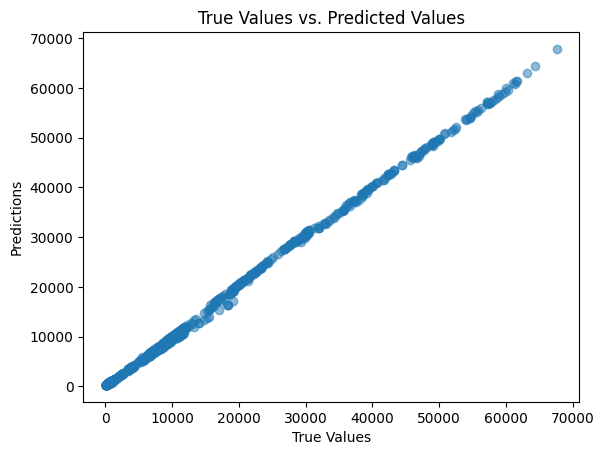

In [189]:
import matplotlib.pyplot as plt

# Assuming you have the true target values for the test data (ground truth) in 'y_test'
# Assuming 'predictions' contains the predicted values for the new data

# Create a scatter plot to compare the true values with the predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values')
plt.show()


Raíz del error cuadrático medio en Train: 0.0
Raíz del error cuadrático medio en Test: 0.0


C:\Users\Luca\AppData\Local\Temp\ipykernel_14420\950446082.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train, bins = 20, label = 'train', color = 'r', kde = True)
d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Luca\AppData\Local\Temp\ipykernel_14420\950446082.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `d

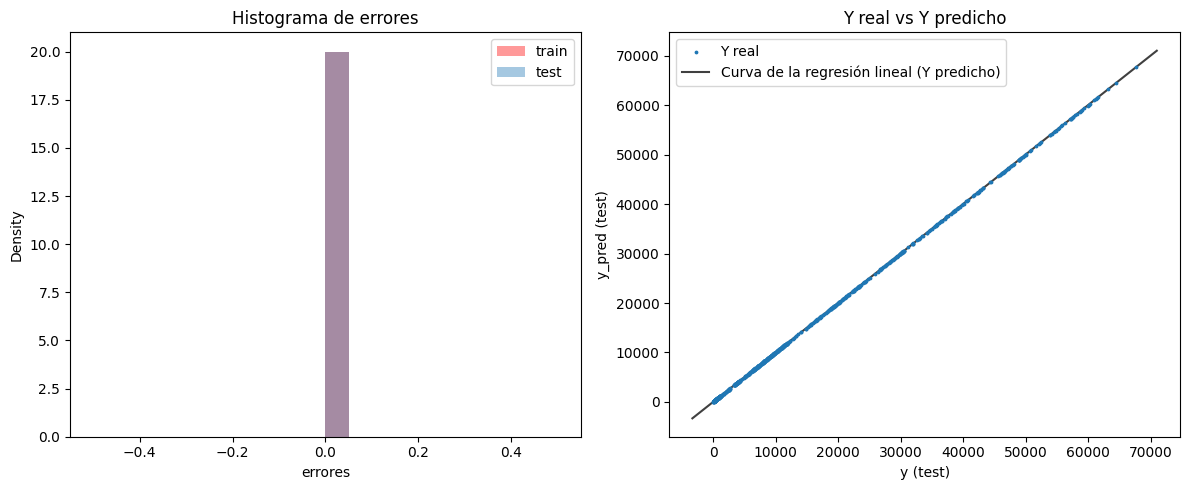

In [190]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error 


import seaborn as sns


rmse_train = (mean_squared_error(y_train, y_train, squared = False))
rmse_test = (mean_squared_error(y_test, y_test, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y_test - y_test, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test, s =3, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

_____________________________________________

# ok, wait, if we add some dimensions..?

In [326]:
# Paso 1: Seleccionar solo las columnas numéricas
numeric_columns = projected_df.select_dtypes(include='number')

# Paso 2 y 3: Calcular la diferencia y agregar las columnas adicionales
for column in numeric_columns:
    diff_column_name = column + '_diff'  # Nombre de la columna adicional
    projected_df[diff_column_name] = projected_df[column].diff()
    diff_column_name = column + '_incremento'  # Nombre de la columna adicional
    projected_df[diff_column_name] = projected_df[column].pct_change() * 100

In [327]:
projected_df

timestamp        prices   market_caps  total_volumes  days  \
0   2022-11-09 00:00:00  18562.353215  3.568716e+11   9.214496e+10     0   
1   2022-11-10 00:00:00  15742.444336  3.019638e+11   7.497868e+10     1   
2   2022-11-11 00:00:00  17594.923500  3.365972e+11   6.520067e+10     2   
3   2022-11-12 00:00:00  17080.215261  3.259211e+11   4.503033e+10     3   
4   2022-11-13 00:00:00  16797.987483  3.223306e+11   2.189400e+10     4   
..                  ...           ...           ...            ...   ...   
278 2023-08-13 18:57:54  34172.649751  6.450808e+11   1.571450e+10   278   
279 2023-08-14 18:57:54  33420.853136  6.555500e+11   1.236592e+10   279   
280 2023-08-15 18:57:54  33190.318083  6.520625e+11   5.751168e+09   280   
281 2023-08-16 18:57:54  33385.359997  6.511292e+11   7.828976e+09   281   
282 2023-08-17 18:57:54  33168.447182  6.699326e+11   7.338223e+09   282   

     prices_diff  prices_incremento  market_caps_diff  market_caps_incremento  \
0            NaN                NaN               NaN                     NaN   
1   -2819.908879         -15.191548     -5.490775e+10              -15.385855   
2    1852.479164          11.767418      3.463336e+10               11.469373   
3    -514.708240          -2.925322     -1.067610e+10               -3.171772   
4    -282.227778          -1.652367     -3.590504e+09               -1.101648   
..           ...                ...               ...                     ...   
278   828.665689           2.485203     -7.106507e+09               -1.089642   
279  -751.796615          -2.199995      1.046922e+10                1.622931   
280  -230.535053          -0.689794     -3.487473e+09               -0.531992   
281   195.041914           0.587647     -9.333411e+08               -0.143137   
282  -216.912815          -0.649724      1.880346e+10                2.887823   

     total_volumes_diff  total_volumes_incremento  days_diff  days_incremento  
0                   NaN                       NaN        NaN              NaN  
1         -1.716629e+10                -18.629654        1.0              inf  
2         -9.778009e+09                -13.041053        1.0       100.000000  
3         -2.017034e+10                -30.935781        1.0        50.000000  
4         -2.313633e+10                -51.379445        1.0        33.333333  
..                  ...                       ...        ...              ...  
278        2.635224e+09                 20.148092        1.0         0.361011  
279       -3.348585e+09                -21.308886        1.0         0.359712  
280       -6.614748e+09                -53.491776        1.0         0.358423  
281        2.077808e+09                 36.128453        1.0         0.357143  
282       -4.907527e+08                 -6.268415        1.0         0.355872  

[283 rows x 13 columns]

In [328]:
projected_df.fillna(0)

timestamp        prices   market_caps  total_volumes  days  \
0   2022-11-09 00:00:00  18562.353215  3.568716e+11   9.214496e+10     0   
1   2022-11-10 00:00:00  15742.444336  3.019638e+11   7.497868e+10     1   
2   2022-11-11 00:00:00  17594.923500  3.365972e+11   6.520067e+10     2   
3   2022-11-12 00:00:00  17080.215261  3.259211e+11   4.503033e+10     3   
4   2022-11-13 00:00:00  16797.987483  3.223306e+11   2.189400e+10     4   
..                  ...           ...           ...            ...   ...   
278 2023-08-13 18:57:54  34172.649751  6.450808e+11   1.571450e+10   278   
279 2023-08-14 18:57:54  33420.853136  6.555500e+11   1.236592e+10   279   
280 2023-08-15 18:57:54  33190.318083  6.520625e+11   5.751168e+09   280   
281 2023-08-16 18:57:54  33385.359997  6.511292e+11   7.828976e+09   281   
282 2023-08-17 18:57:54  33168.447182  6.699326e+11   7.338223e+09   282   

     prices_diff  prices_incremento  market_caps_diff  market_caps_incremento  \
0       0.000000           0.000000      0.000000e+00                0.000000   
1   -2819.908879         -15.191548     -5.490775e+10              -15.385855   
2    1852.479164          11.767418      3.463336e+10               11.469373   
3    -514.708240          -2.925322     -1.067610e+10               -3.171772   
4    -282.227778          -1.652367     -3.590504e+09               -1.101648   
..           ...                ...               ...                     ...   
278   828.665689           2.485203     -7.106507e+09               -1.089642   
279  -751.796615          -2.199995      1.046922e+10                1.622931   
280  -230.535053          -0.689794     -3.487473e+09               -0.531992   
281   195.041914           0.587647     -9.333411e+08               -0.143137   
282  -216.912815          -0.649724      1.880346e+10                2.887823   

     total_volumes_diff  total_volumes_incremento  days_diff  days_incremento  
0          0.000000e+00                  0.000000        0.0         0.000000  
1         -1.716629e+10                -18.629654        1.0              inf  
2         -9.778009e+09                -13.041053        1.0       100.000000  
3         -2.017034e+10                -30.935781        1.0        50.000000  
4         -2.313633e+10                -51.379445        1.0        33.333333  
..                  ...                       ...        ...              ...  
278        2.635224e+09                 20.148092        1.0         0.361011  
279       -3.348585e+09                -21.308886        1.0         0.359712  
280       -6.614748e+09                -53.491776        1.0         0.358423  
281        2.077808e+09                 36.128453        1.0         0.357143  
282       -4.907527e+08                 -6.268415        1.0         0.355872  

[283 rows x 13 columns]

In [329]:
projected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 283 non-null    datetime64[ns]
 1   prices                    283 non-null    float64       
 2   market_caps               283 non-null    float64       
 3   total_volumes             283 non-null    float64       
 4   days                      283 non-null    int64         
 5   prices_diff               282 non-null    float64       
 6   prices_incremento         282 non-null    float64       
 7   market_caps_diff          282 non-null    float64       
 8   market_caps_incremento    282 non-null    float64       
 9   total_volumes_diff        282 non-null    float64       
 10  total_volumes_incremento  282 non-null    float64       
 11  days_diff                 282 non-null    float64       
 12  days_incremento       

In [330]:
# sns.pairplot(projected_df)

#### Las nuevas dimensiones creadas son viables y aportan informacion al ML ya que se pueden observar nuevas distribuciones normales agregadas y nuevas tendencias

In [331]:
projected_df.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
days                        0
prices_diff                 1
prices_incremento           1
market_caps_diff            1
market_caps_incremento      1
total_volumes_diff          1
total_volumes_incremento    1
days_diff                   1
days_incremento             1
dtype: int64

In [332]:
projected_df = projected_df.fillna(0)

In [333]:
import missingno as msno

<Axes: >

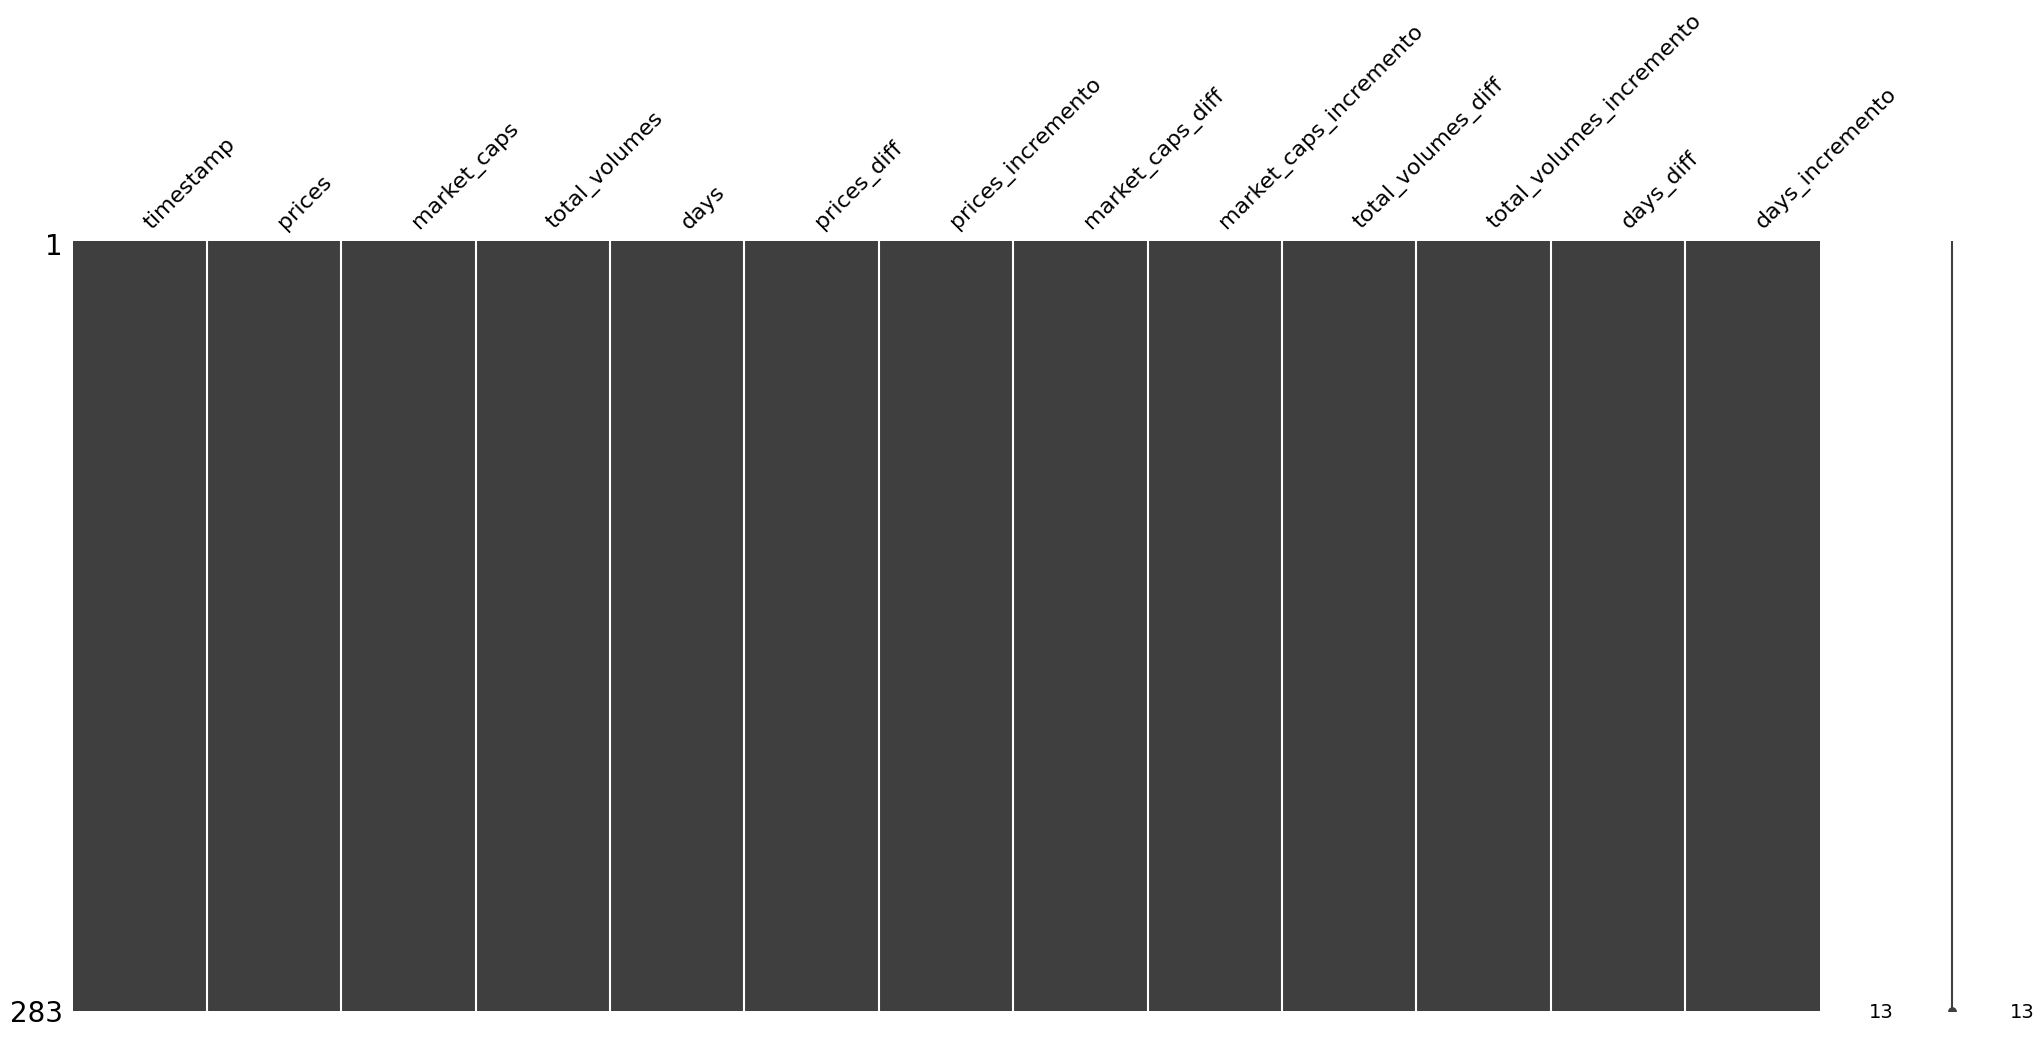

In [334]:
# Visualizar los valores nulos utilizando missingno
msno.matrix(projected_df)

In [335]:
projected_df = projected_df.drop_duplicates()

In [336]:
projected_df.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
days                        0
prices_diff                 0
prices_incremento           0
market_caps_diff            0
market_caps_incremento      0
total_volumes_diff          0
total_volumes_incremento    0
days_diff                   0
days_incremento             0
dtype: int64

In [337]:
projected_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 283 non-null    datetime64[ns]
 1   prices                    283 non-null    float64       
 2   market_caps               283 non-null    float64       
 3   total_volumes             283 non-null    float64       
 4   days                      283 non-null    int64         
 5   prices_diff               283 non-null    float64       
 6   prices_incremento         283 non-null    float64       
 7   market_caps_diff          283 non-null    float64       
 8   market_caps_incremento    283 non-null    float64       
 9   total_volumes_diff        283 non-null    float64       
 10  total_volumes_incremento  283 non-null    float64       
 11  days_diff                 283 non-null    float64       
 12  days_incremento       

#### Los datos eliminados corresponden a datos muy vejos, como el msno muestra. no hay problema con dropearlos..

<Axes: >

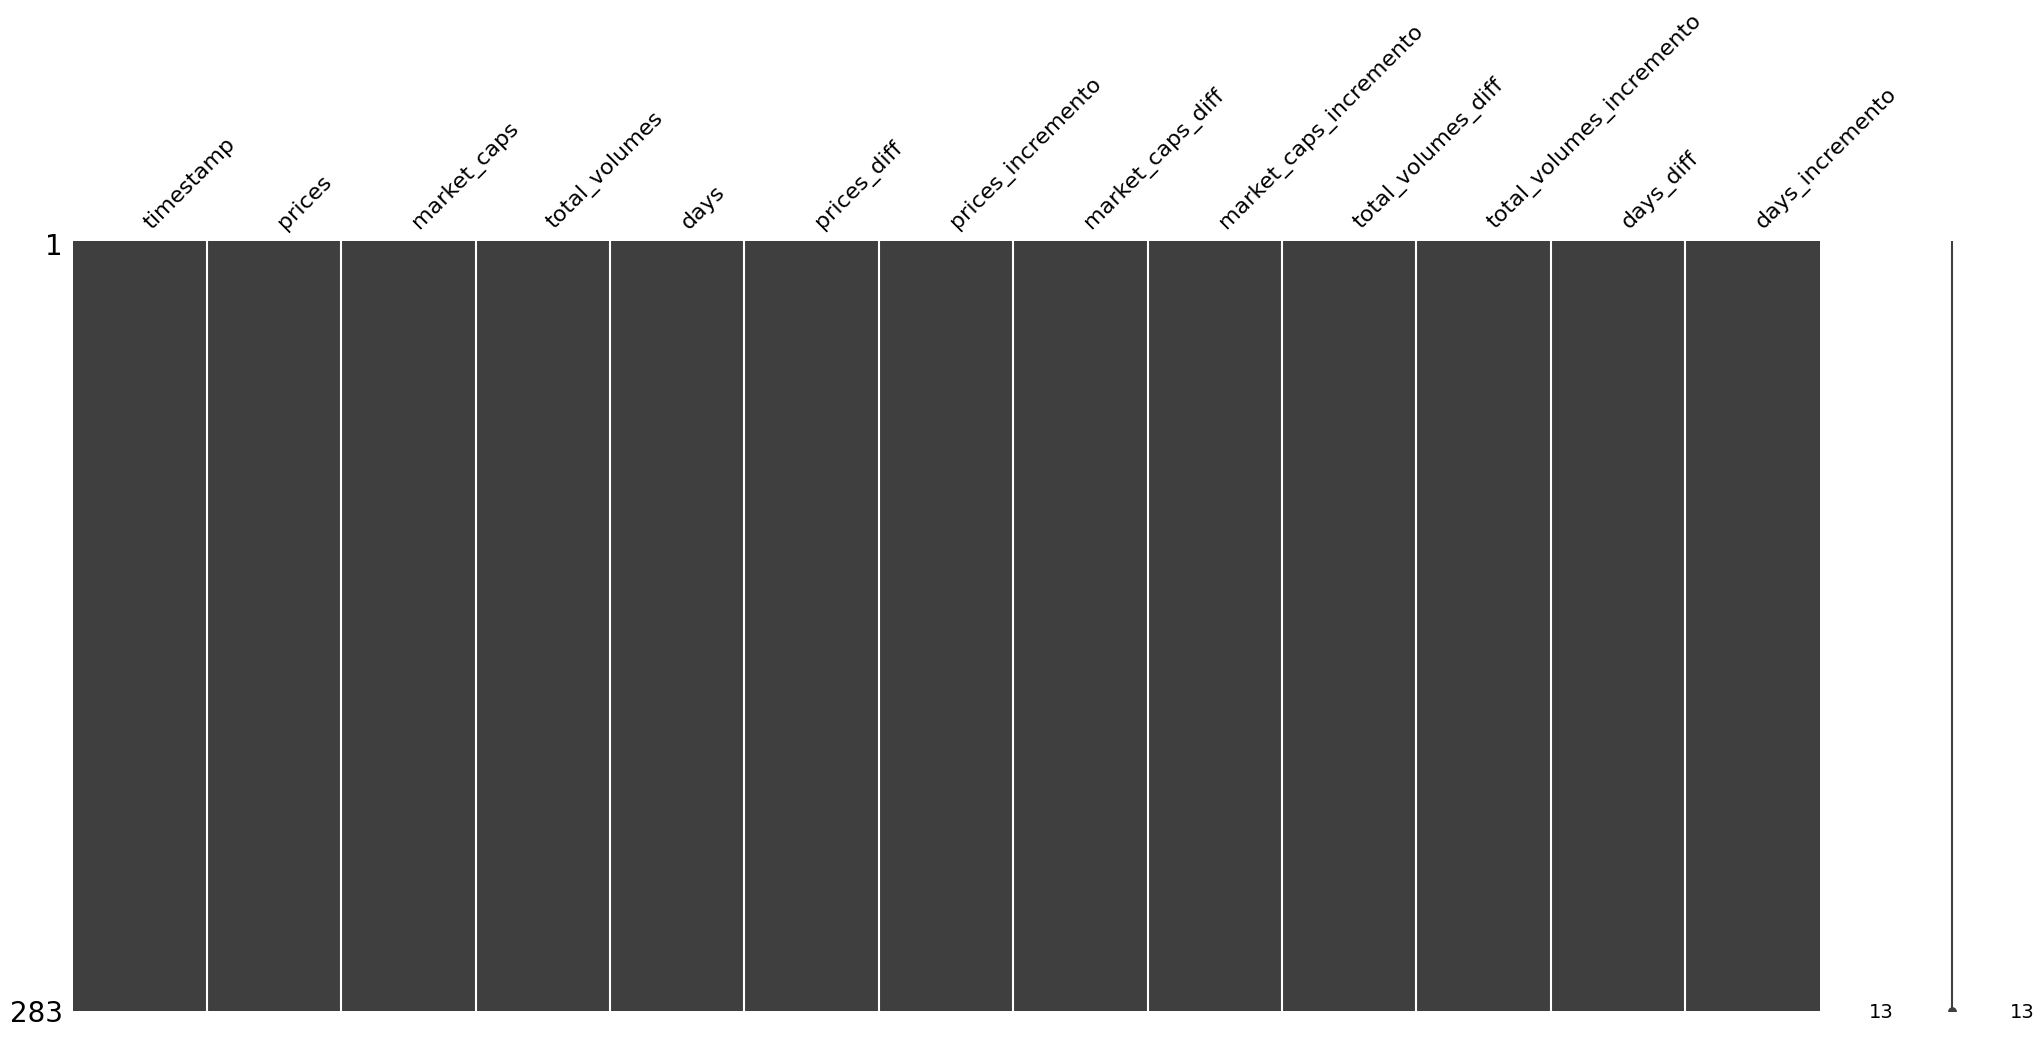

In [338]:
# Visualizar los valores nulos utilizando missingno
msno.matrix(projected_df)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


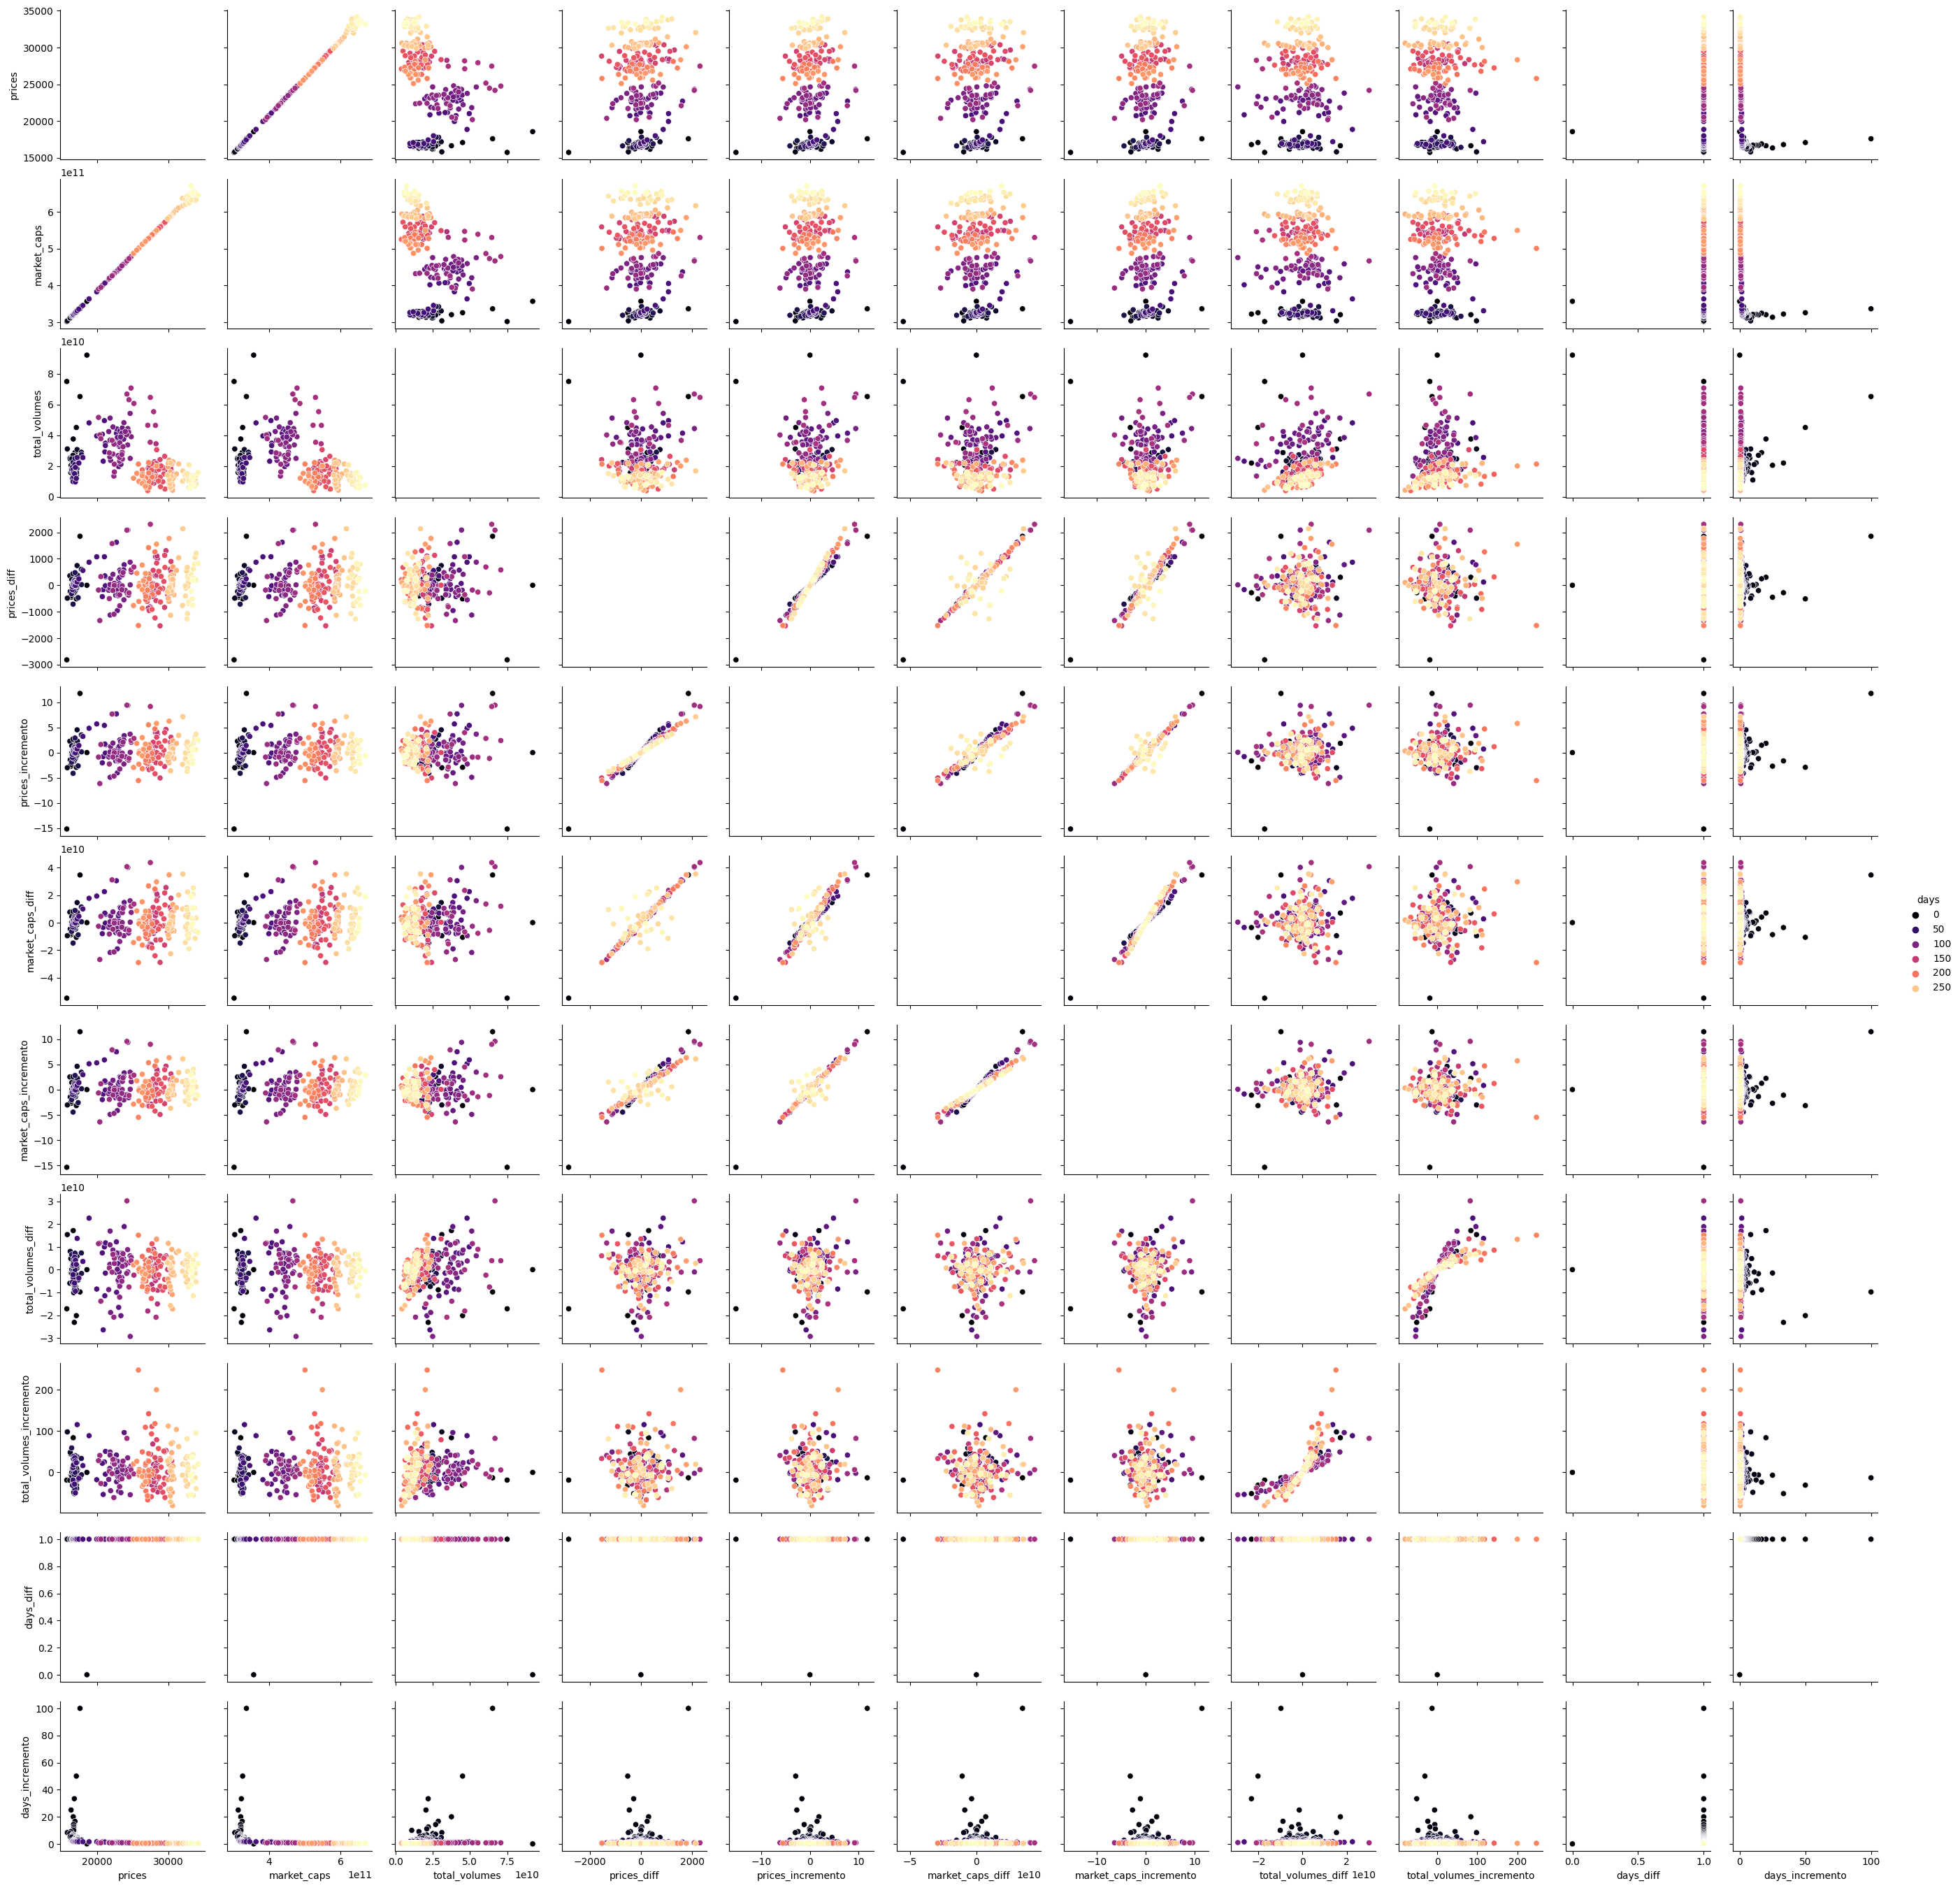

In [339]:
sns.pairplot(projected_df, hue= 'days', palette='magma')

In [343]:
projected_df.describe()

timestamp        prices   market_caps  \
count                            283    283.000000  2.830000e+02   
mean   2023-03-29 23:26:54.466430976  24942.356692  4.822824e+11   
min              2022-11-09 00:00:00  15742.444336  3.019638e+11   
25%              2023-01-18 12:00:00  20790.037769  4.005235e+11   
50%              2023-03-30 00:00:00  26475.607903  5.132957e+11   
75%              2023-06-08 12:00:00  29278.969522  5.669341e+11   
max              2023-08-17 18:57:54  34172.649751  6.699326e+11   
std                              NaN   5451.698761  1.067464e+11   

       total_volumes        days  prices_diff  prices_incremento  \
count   2.830000e+02  283.000000   283.000000         283.000000   
mean    2.172042e+10  141.000000    51.611639           0.238801   
min     3.882362e+09    0.000000 -2819.908879         -15.191548   
25%     1.204503e+10   70.500000  -232.437363          -0.945113   
50%     1.769910e+10  141.000000    -6.772146          -0.030203   
75%     2.645864e+10  211.500000   326.085874           1.326679   
max     9.214496e+10  282.000000  2305.405812          11.767418   
std     1.386065e+10   81.839273   618.302196           2.596255   

       market_caps_diff  market_caps_incremento  total_volumes_diff  \
count      2.830000e+02              283.000000        2.830000e+02   
mean       1.106223e+09                0.255842       -2.996705e+08   
min       -5.490775e+10              -15.385855       -2.930026e+10   
25%       -4.623246e+09               -0.988826       -4.042314e+09   
50%       -1.996977e+08               -0.061150        1.559756e+08   
75%        6.560407e+09                1.296359        3.922397e+09   
max        4.366262e+10               11.469373        3.015926e+10   
std        1.178694e+10                2.578052        7.630836e+09   

       total_volumes_incremento   days_diff  days_incremento  
count                283.000000  283.000000       283.000000  
mean                   6.528390    0.996466              inf  
min                  -80.345625    0.000000         0.000000  
25%                  -17.581930    1.000000         0.472816  
50%                    0.477080    1.000000         0.709220  
75%                   26.688619    1.000000         1.418511  
max                  247.790667    1.000000              inf  
std                   41.622869    0.059444              NaN

In [344]:
projected_df.tail()


timestamp        prices   market_caps  total_volumes  days  \
278 2023-08-13 18:57:54  34172.649751  6.450808e+11   1.571450e+10   278   
279 2023-08-14 18:57:54  33420.853136  6.555500e+11   1.236592e+10   279   
280 2023-08-15 18:57:54  33190.318083  6.520625e+11   5.751168e+09   280   
281 2023-08-16 18:57:54  33385.359997  6.511292e+11   7.828976e+09   281   
282 2023-08-17 18:57:54  33168.447182  6.699326e+11   7.338223e+09   282   

     prices_diff  prices_incremento  market_caps_diff  market_caps_incremento  \
278   828.665689           2.485203     -7.106507e+09               -1.089642   
279  -751.796615          -2.199995      1.046922e+10                1.622931   
280  -230.535053          -0.689794     -3.487473e+09               -0.531992   
281   195.041914           0.587647     -9.333411e+08               -0.143137   
282  -216.912815          -0.649724      1.880346e+10                2.887823   

     total_volumes_diff  total_volumes_incremento  days_diff  days_incremento  
278        2.635224e+09                 20.148092        1.0         0.361011  
279       -3.348585e+09                -21.308886        1.0         0.359712  
280       -6.614748e+09                -53.491776        1.0         0.358423  
281        2.077808e+09                 36.128453        1.0         0.357143  
282       -4.907527e+08                 -6.268415        1.0         0.355872

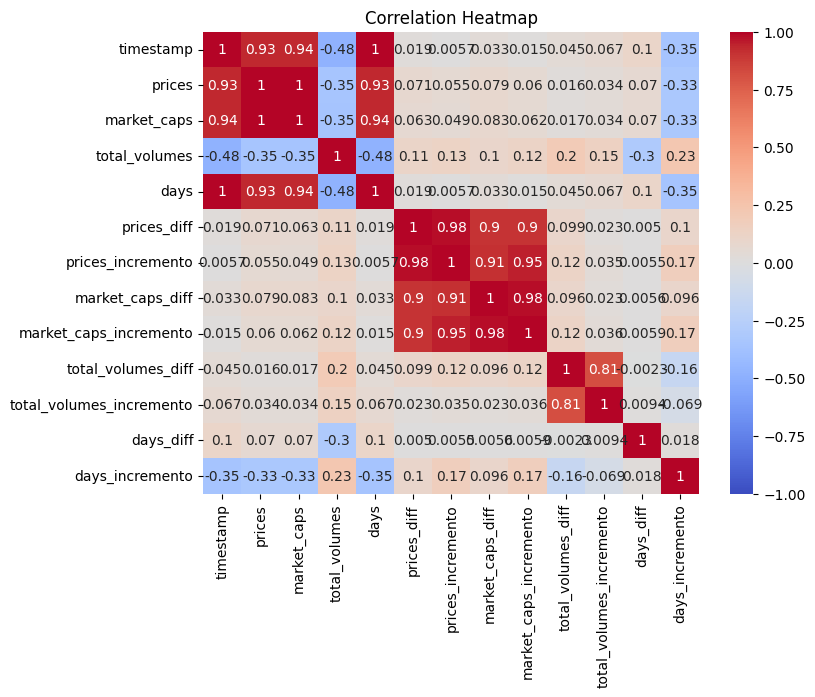

                          timestamp    prices  market_caps  total_volumes  \
timestamp                  1.000000  0.934369     0.936474      -0.476986   
prices                     0.934369  1.000000     0.999404      -0.348243   
market_caps                0.936474  0.999404     1.000000      -0.352478   
total_volumes             -0.476986 -0.348243    -0.352478       1.000000   
days                       1.000000  0.934375     0.936478      -0.476976   
prices_diff                0.018805  0.071287     0.063070       0.110572   
prices_incremento          0.005741  0.055355     0.049005       0.125465   
market_caps_diff           0.032926  0.079368     0.083156       0.100195   
market_caps_incremento     0.014864  0.060072     0.062394       0.117493   
total_volumes_diff         0.044801  0.016318     0.016830       0.196023   
total_volumes_incremento   0.067290  0.033684     0.034357       0.146349   
days_diff                  0.102806  0.069812     0.070085      -0.303099   

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = projected_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

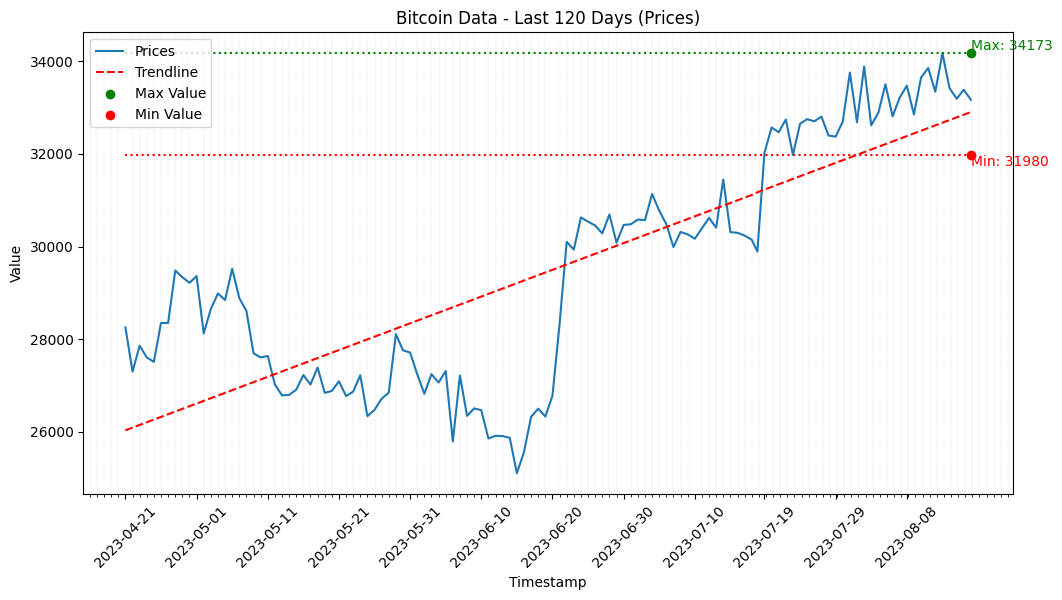

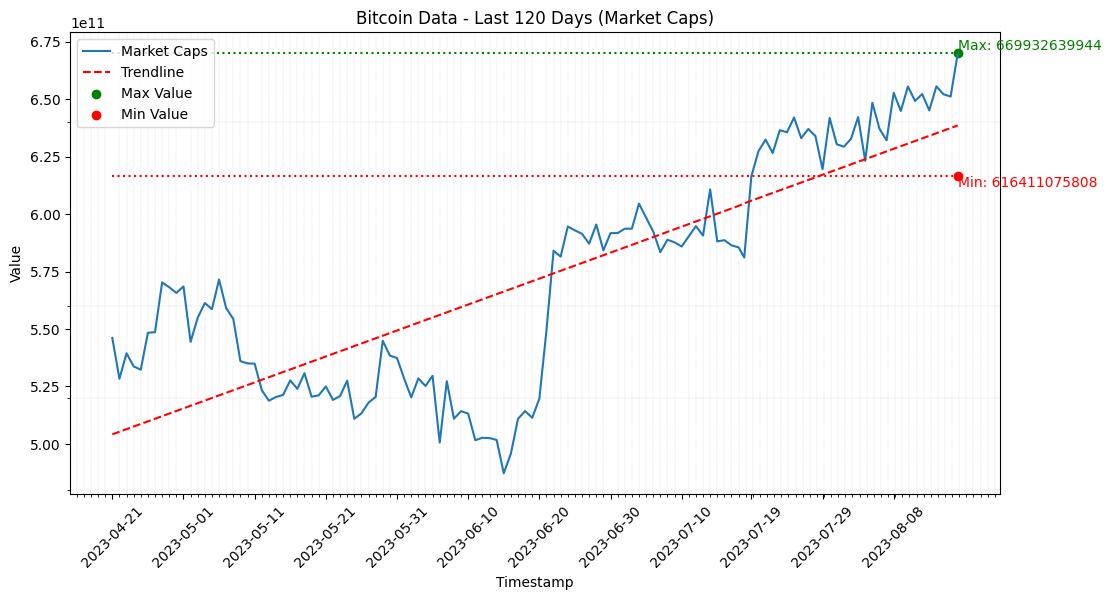

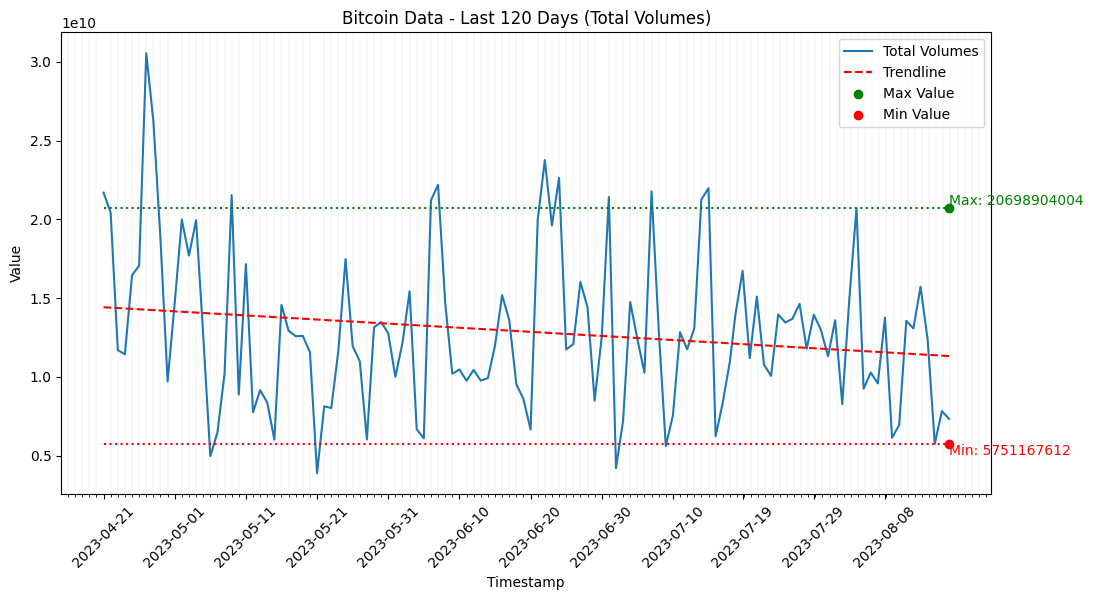

In [346]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = projected_df.tail(120)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de precios
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()

# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de market_caps
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de market_caps
plt.show()

# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de total_volumes
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de total_volumes
plt.show()


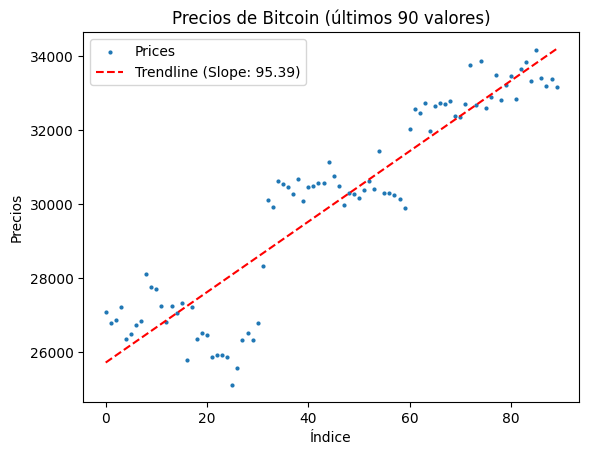

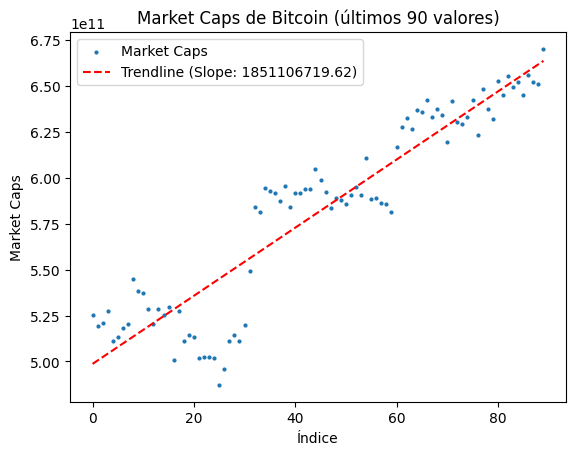

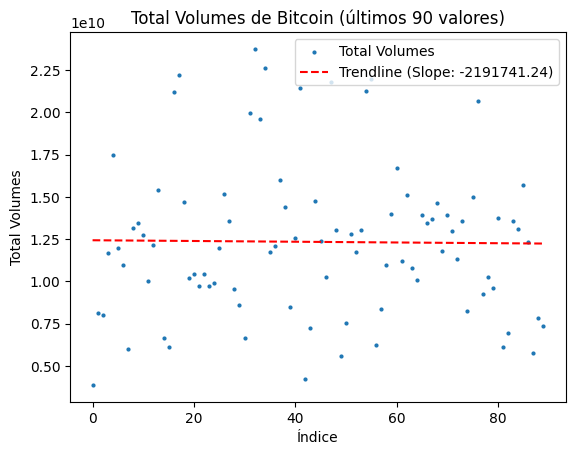

In [347]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 90 valores de los DataFrames
last_90_prices = projected_df['prices'].tail(90)
last_90_market_caps = projected_df['market_caps'].tail(90)
last_90_total_volumes = projected_df['total_volumes'].tail(90)

# Crear un rango de índices para los últimos 90 valores
indices = range(len(last_90_prices))

# Graficar los valores de precios
plt.scatter(indices, last_90_prices, s=4, label='Prices')

# Calcular la pendiente de los precios
slope_prices, _ = np.polyfit(indices, last_90_prices, 1)
slope_prices_str = '{:.2f}'.format(slope_prices)

# Graficar la línea de tendencia de los precios
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_prices, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_prices_str + ')')

plt.title("Precios de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Precios")
plt.legend()
plt.show()

# Graficar los valores de market_caps
plt.scatter(indices, last_90_market_caps, s=4, label='Market Caps')

# Calcular la pendiente de los market_caps
slope_market_caps, _ = np.polyfit(indices, last_90_market_caps, 1)
slope_market_caps_str = '{:.2f}'.format(slope_market_caps)

# Graficar la línea de tendencia de los market_caps
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_market_caps, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_market_caps_str + ')')

plt.title("Market Caps de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Market Caps")
plt.legend()
plt.show()

# Graficar los valores de total_volumes
plt.scatter(indices, last_90_total_volumes, s=4, label='Total Volumes')

# Calcular la pendiente de los total_volumes
slope_total_volumes, _ = np.polyfit(indices, last_90_total_volumes, 1)
slope_total_volumes_str = '{:.2f}'.format(slope_total_volumes)

# Graficar la línea de tendencia de los total_volumes
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_total_volumes, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_total_volumes_str + ')')

plt.title("Total Volumes de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Total Volumes")
plt.legend()
plt.show()

__________________________________________

# Linear regresion con transpuesta.

In [214]:
df_bit.tail(100)

timestamp        prices   market_caps  total_volumes
3633 2023-04-11 00:00:00  29657.974137  5.740596e+11   1.747538e+10
3634 2023-04-12 00:00:00  30260.936109  5.853593e+11   1.832030e+10
3635 2023-04-13 00:00:00  29904.138695  5.788506e+11   1.840770e+10
3636 2023-04-14 00:00:00  30405.027313  5.879390e+11   1.640403e+10
3637 2023-04-15 00:00:00  30468.408701  5.890514e+11   2.098407e+10
...                  ...           ...           ...            ...
3728 2023-07-15 00:00:00  30311.827808  5.881074e+11   2.197715e+10
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10
3732 2023-07-18 18:57:54  29892.172223  5.810628e+11   1.399250e+10

[100 rows x 4 columns]

____________________________________________________________________

# Intento linear Regresion con transpuesta:

## ok, wait, if we add some dimensions..?

In [215]:
# Paso 1: Seleccionar solo las columnas numéricas
numeric_columns = df_bit.select_dtypes(include='number')

# Paso 2 y 3: Calcular la diferencia y agregar las columnas adicionales
for column in numeric_columns:
    diff_column_name = column + '_diff'  # Nombre de la columna adicional
    df_bit[diff_column_name] = df_bit[column].diff()
    diff_column_name = column + '_incremento'  # Nombre de la columna adicional
    df_bit[diff_column_name] = df_bit[column].pct_change() * 100

In [216]:
df_bit

timestamp        prices   market_caps  total_volumes  \
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00   
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00   
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00   
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00   
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00   
...                  ...           ...           ...            ...   
3728 2023-07-15 00:00:00  30311.827808  5.881074e+11   2.197715e+10   
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09   
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09   
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10   
3732 2023-07-18 18:57:54  29892.172223  5.810628e+11   1.399250e+10   

      prices_diff  prices_incremento  market_caps_diff  \
0             NaN                NaN               NaN   
1        6.660000           4.922395      7.451441e+07   
2       -6.660000          -4.691462     -7.337451e+07   
3      -18.300000         -13.525499     -2.027059e+08   
4      -13.570000         -11.598291     -1.502838e+08   
...           ...                ...               ...   
3728 -1134.187163          -3.606775     -2.261806e+10   
3729   -13.856408          -0.045713      5.346873e+08   
3730   -60.636615          -0.200134     -2.250700e+09   
3731   -89.474706          -0.295908     -8.907138e+08   
3732  -255.687857          -0.848113     -4.437913e+09   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
0                        NaN                 NaN                       NaN  
1                   4.965914        0.000000e+00                       NaN  
2                  -4.658604        0.000000e+00                       NaN  
3                 -13.498813        0.000000e+00                       NaN  
4                 -11.569625        0.000000e+00                       NaN  
...                      ...                 ...                       ...  
3728               -3.703474        7.228771e+08                  3.401090  
3729                0.090917       -1.574323e+10                -71.634554  
3730               -0.382355        2.122494e+09                 34.047511  
3731               -0.151897        2.617973e+09                 31.328917  
3732               -0.757969        3.018113e+09                 27.501439  

[3732 rows x 10 columns]

In [217]:
df_bit.fillna(0)

timestamp        prices   market_caps  total_volumes  \
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00   
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00   
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00   
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00   
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00   
...                  ...           ...           ...            ...   
3728 2023-07-15 00:00:00  30311.827808  5.881074e+11   2.197715e+10   
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09   
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09   
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10   
3732 2023-07-18 18:57:54  29892.172223  5.810628e+11   1.399250e+10   

      prices_diff  prices_incremento  market_caps_diff  \
0        0.000000           0.000000      0.000000e+00   
1        6.660000           4.922395      7.451441e+07   
2       -6.660000          -4.691462     -7.337451e+07   
3      -18.300000         -13.525499     -2.027059e+08   
4      -13.570000         -11.598291     -1.502838e+08   
...           ...                ...               ...   
3728 -1134.187163          -3.606775     -2.261806e+10   
3729   -13.856408          -0.045713      5.346873e+08   
3730   -60.636615          -0.200134     -2.250700e+09   
3731   -89.474706          -0.295908     -8.907138e+08   
3732  -255.687857          -0.848113     -4.437913e+09   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
0                   0.000000        0.000000e+00                  0.000000  
1                   4.965914        0.000000e+00                  0.000000  
2                  -4.658604        0.000000e+00                  0.000000  
3                 -13.498813        0.000000e+00                  0.000000  
4                 -11.569625        0.000000e+00                  0.000000  
...                      ...                 ...                       ...  
3728               -3.703474        7.228771e+08                  3.401090  
3729                0.090917       -1.574323e+10                -71.634554  
3730               -0.382355        2.122494e+09                 34.047511  
3731               -0.151897        2.617973e+09                 31.328917  
3732               -0.757969        3.018113e+09                 27.501439  

[3732 rows x 10 columns]

In [218]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3732 entries, 0 to 3732
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 3732 non-null   datetime64[ns]
 1   prices                    3732 non-null   float64       
 2   market_caps               3732 non-null   float64       
 3   total_volumes             3732 non-null   float64       
 4   prices_diff               3731 non-null   float64       
 5   prices_incremento         3731 non-null   float64       
 6   market_caps_diff          3731 non-null   float64       
 7   market_caps_incremento    3731 non-null   float64       
 8   total_volumes_diff        3731 non-null   float64       
 9   total_volumes_incremento  3490 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 449.8 KB


In [219]:
# sns.pairplot(projected_df)

#### Las nuevas dimensiones creadas son viables y aportan informacion al ML ya que se pueden observar nuevas distribuciones normales agregadas y nuevas tendencias

In [220]:
df_bit.isnull().sum()

timestamp                     0
prices                        0
market_caps                   0
total_volumes                 0
prices_diff                   1
prices_incremento             1
market_caps_diff              1
market_caps_incremento        1
total_volumes_diff            1
total_volumes_incremento    242
dtype: int64

In [221]:
df_bit = df_bit.fillna(0)

In [222]:
import missingno as msno

<Axes: >

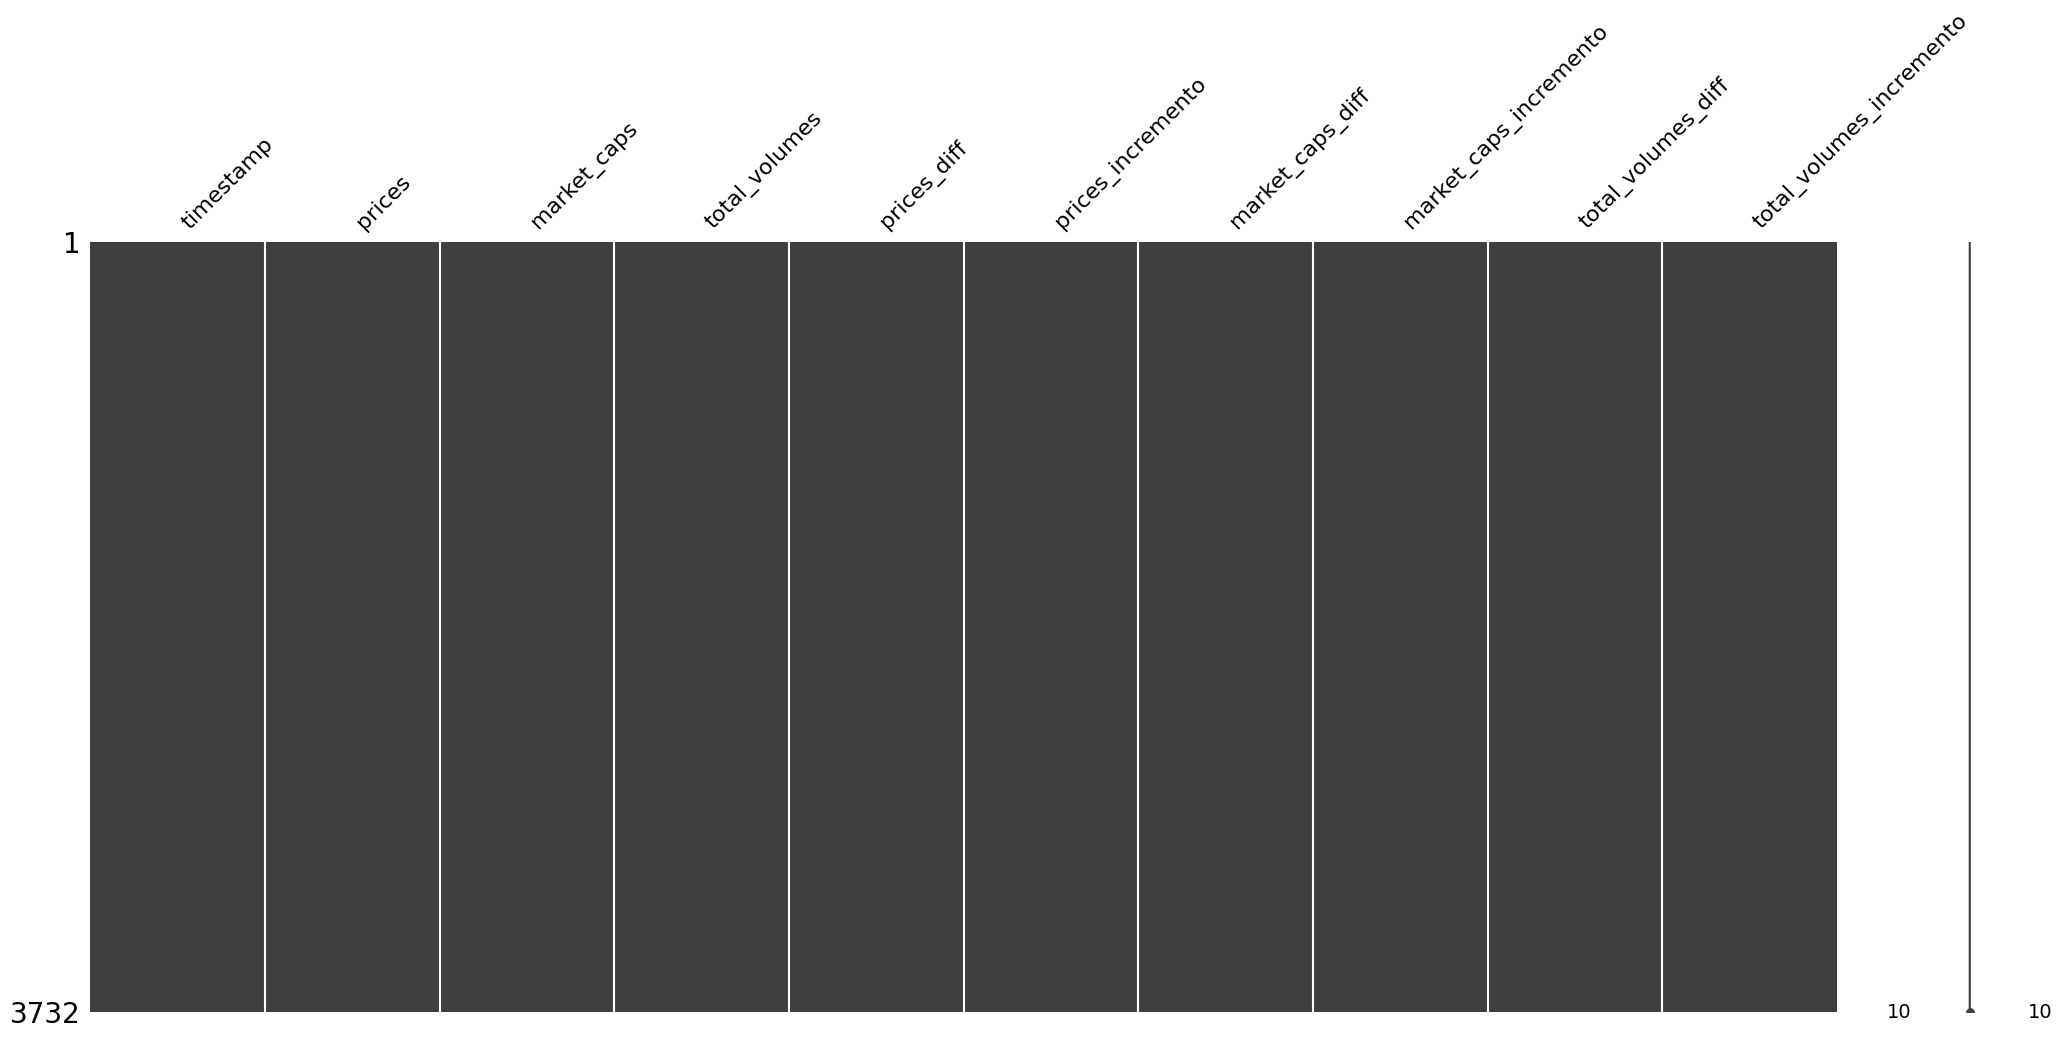

In [223]:
# Visualizar los valores nulos utilizando missingno
msno.matrix(df_bit)

In [224]:
df_bit = df_bit.drop_duplicates()

In [225]:
df_bit.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
prices_diff                 0
prices_incremento           0
market_caps_diff            0
market_caps_incremento      0
total_volumes_diff          0
total_volumes_incremento    0
dtype: int64

In [226]:
df_bit.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3732 entries, 0 to 3732
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 3732 non-null   datetime64[ns]
 1   prices                    3732 non-null   float64       
 2   market_caps               3732 non-null   float64       
 3   total_volumes             3732 non-null   float64       
 4   prices_diff               3732 non-null   float64       
 5   prices_incremento         3732 non-null   float64       
 6   market_caps_diff          3732 non-null   float64       
 7   market_caps_incremento    3732 non-null   float64       
 8   total_volumes_diff        3732 non-null   float64       
 9   total_volumes_incremento  3732 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 449.8 KB


#### Los datos eliminados corresponden a datos muy vejos, como el msno muestra. no hay problema con dropearlos..

<Axes: >

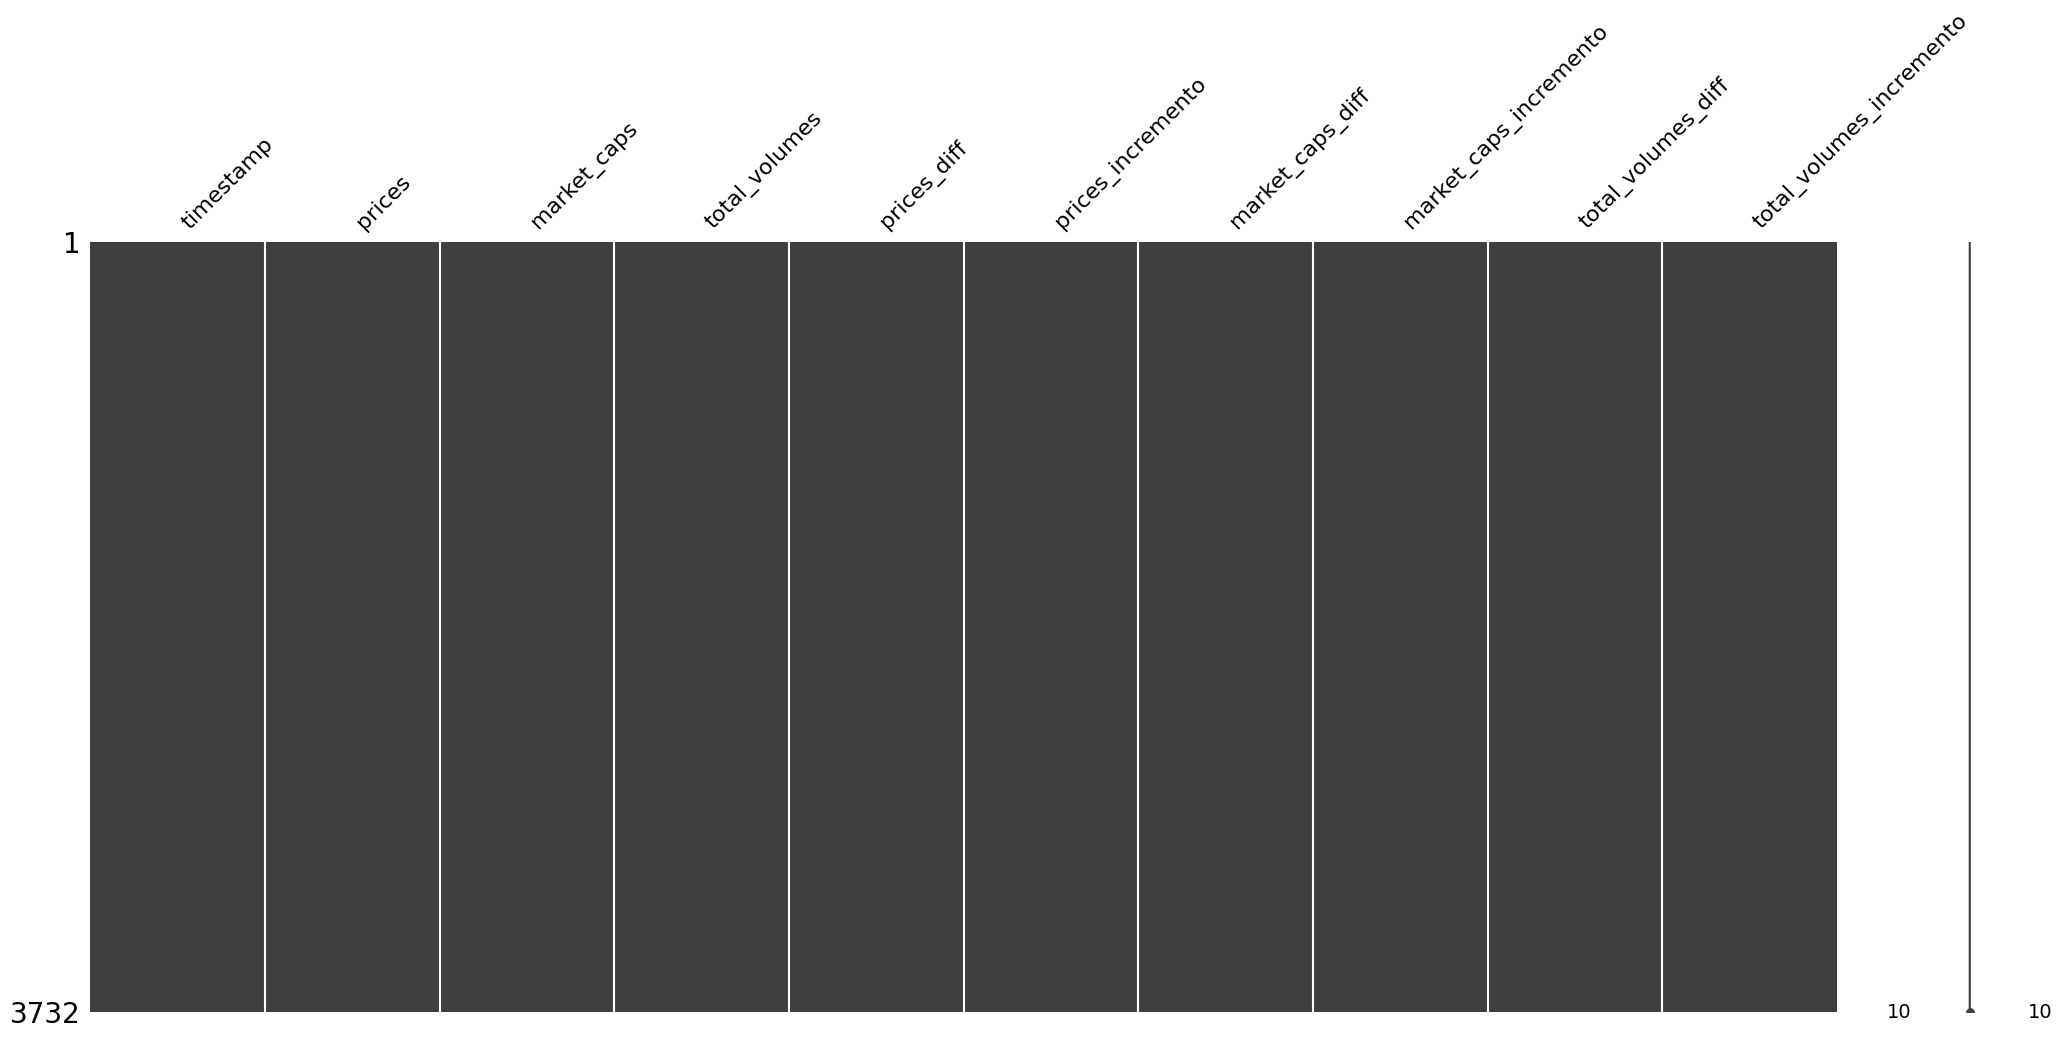

In [227]:
# Visualizar los valores nulos utilizando missingno
msno.matrix(df_bit)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


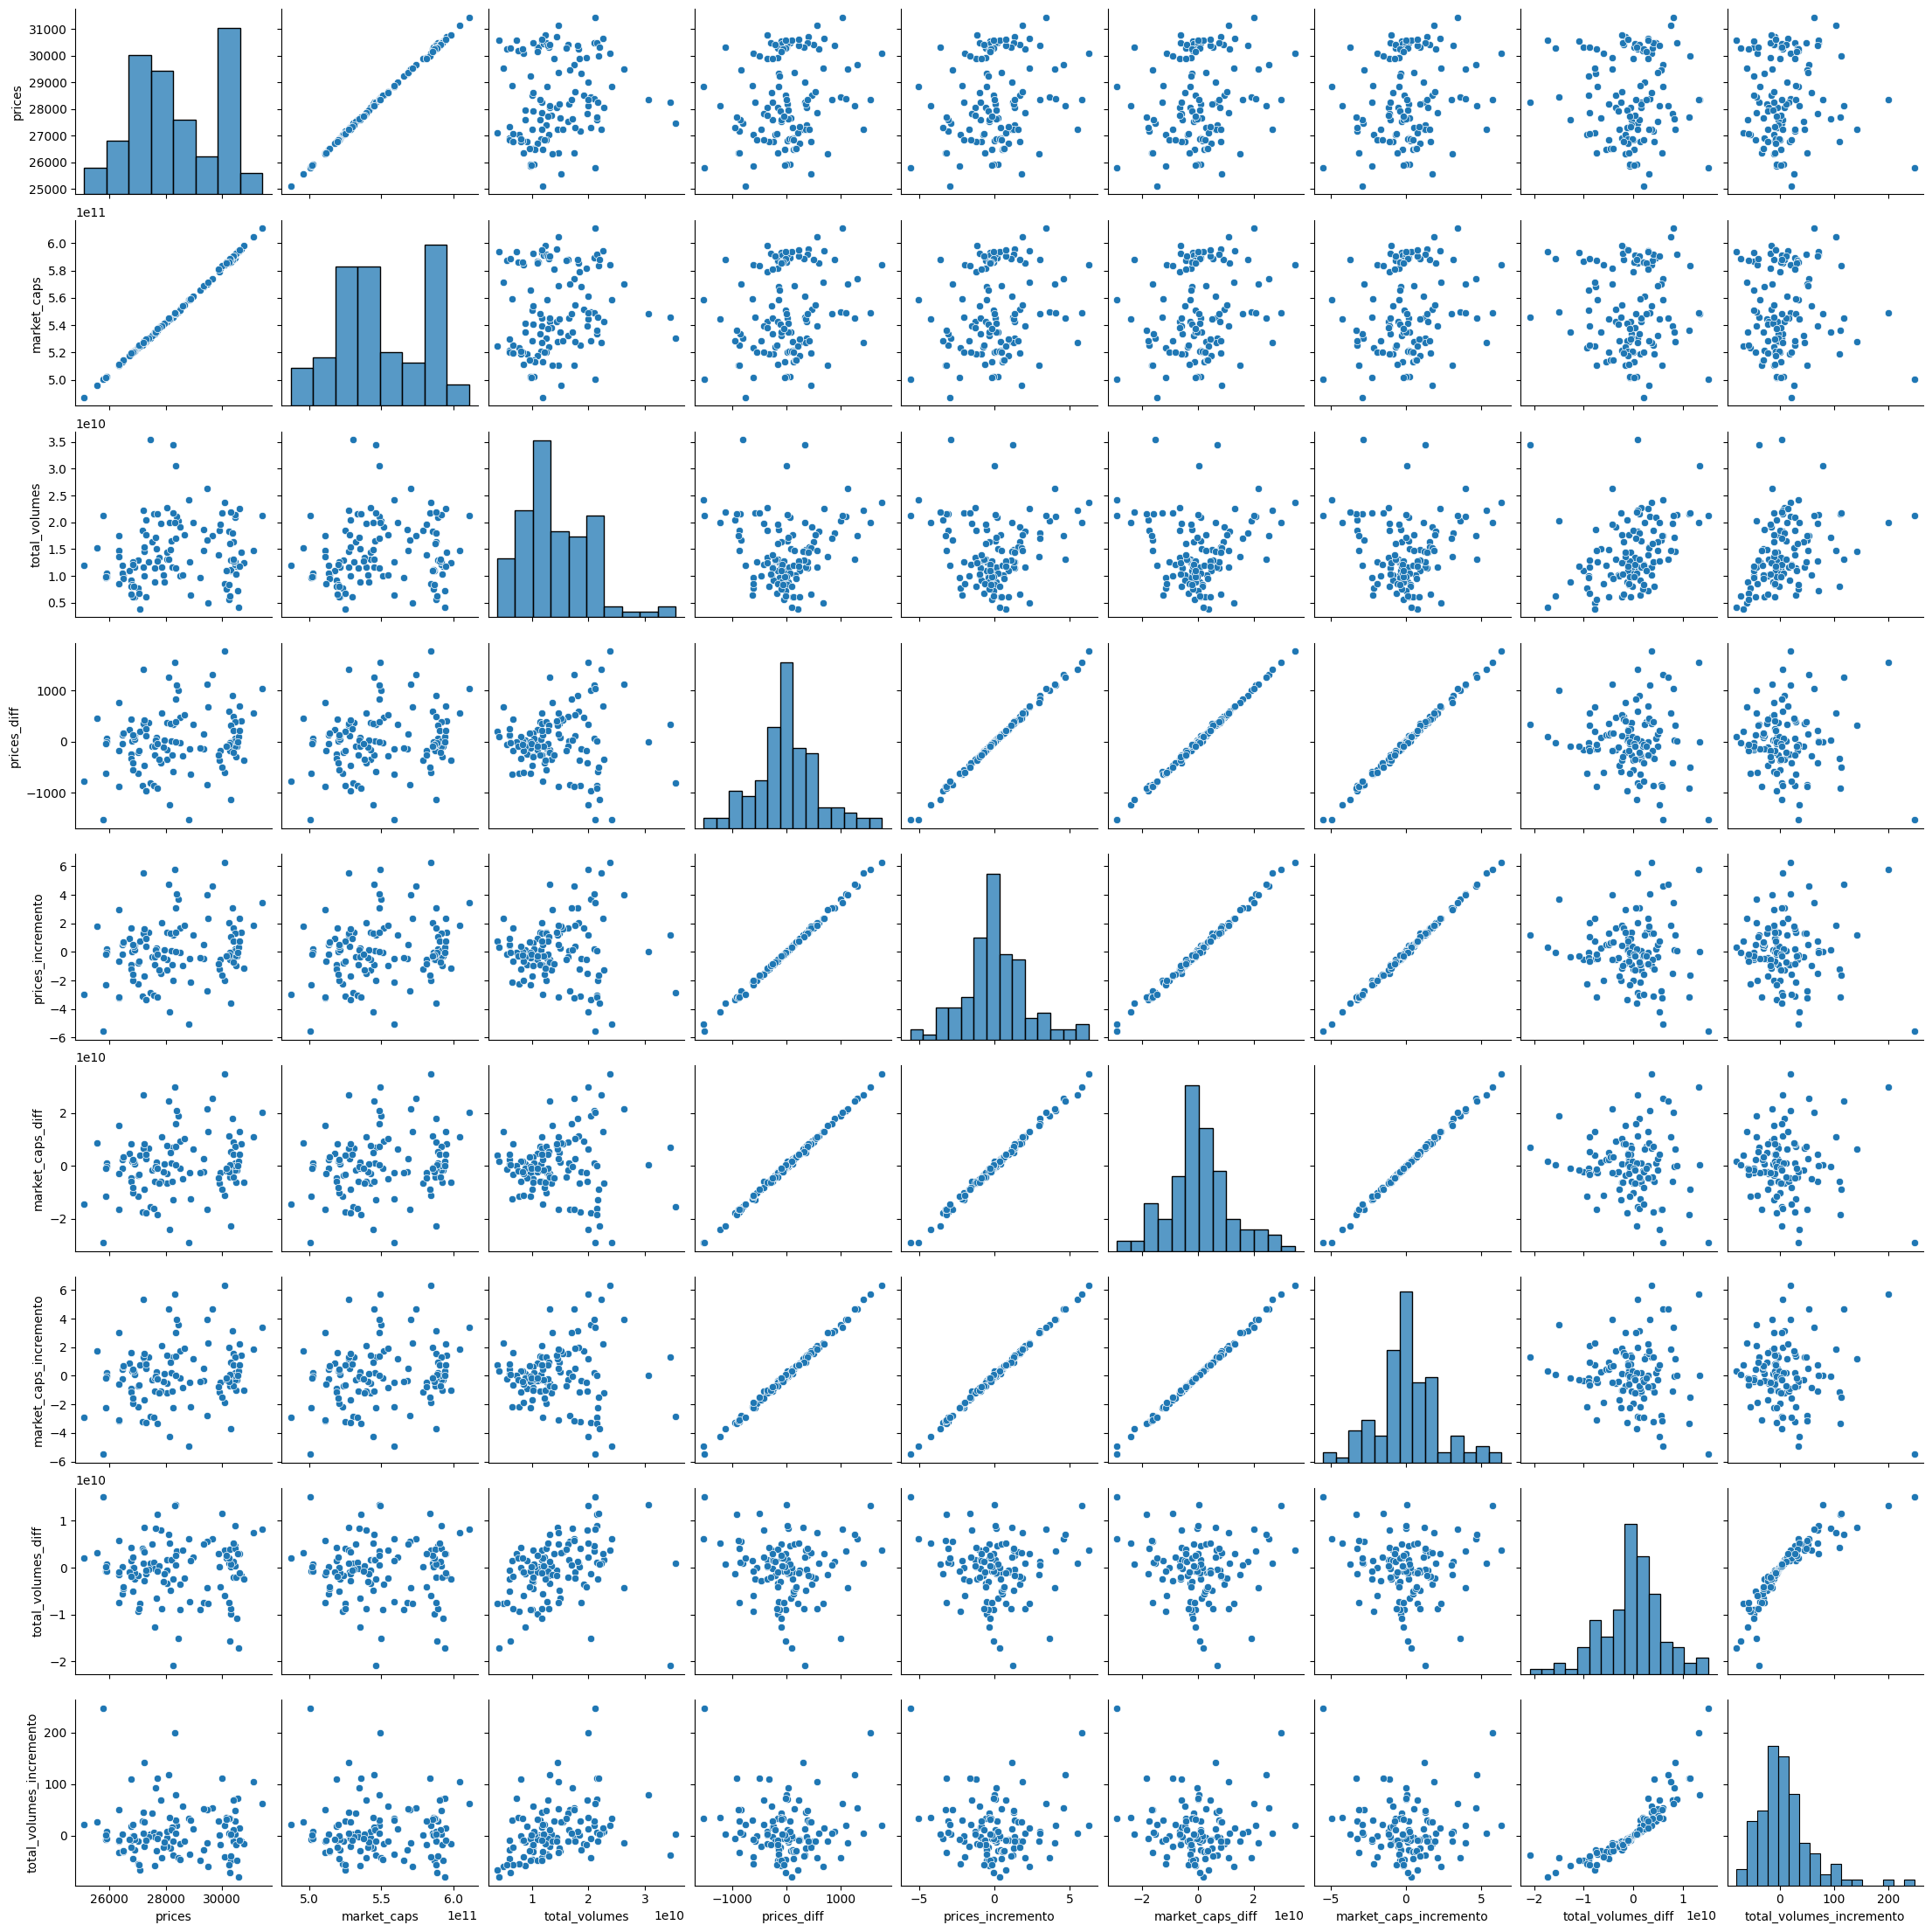

In [228]:
sns.pairplot(df_bit.iloc[-120:,:])

In [229]:
df_bit.describe()

timestamp        prices   market_caps  \
count                           3732   3732.000000  3.732000e+03   
mean   2018-06-08 22:26:55.079940352  11885.145538  2.207411e+11   
min              2013-04-28 00:00:00     67.809000  7.713681e+08   
25%              2015-11-18 18:00:00    567.348296  7.303965e+09   
50%              2018-06-09 12:00:00   6323.480991  1.091581e+11   
75%              2020-12-28 06:00:00  17102.404802  3.251682e+11   
max              2023-07-18 18:57:54  67617.015545  1.278798e+12   
std                              NaN  15584.211643  2.953263e+11   

       total_volumes  prices_diff  prices_incremento  market_caps_diff  \
count   3.732000e+03  3732.000000        3732.000000      3.732000e+03   
mean    1.413584e+10     7.973438           0.225183      1.552954e+08   
min     0.000000e+00 -6924.210173         -35.190269     -1.294806e+11   
25%     1.305524e+08   -44.542453          -1.336609     -7.161843e+08   
50%     3.553782e+09     1.144150           0.158703      1.770233e+07   
75%     2.429303e+10    67.162449           1.828744      1.176839e+09   
max     1.788941e+11  7474.233857          33.255625      1.389789e+11   
std     1.844197e+10   733.302999           4.003424      1.365603e+10   

       market_caps_incremento  total_volumes_diff  total_volumes_incremento  
count             3732.000000        3.732000e+03               3732.000000  
mean                 0.240168        3.749329e+06                       inf  
min                -35.775702       -1.042369e+11                -99.592742  
25%                 -1.283099       -5.738740e+08                -15.389229  
50%                  0.184851        0.000000e+00                  0.000000  
75%                  1.829737        4.872722e+08                 16.273353  
max                 33.272357        1.216206e+11                       inf  
std                  4.000804        7.029400e+09                       NaN

In [230]:
df_bit.tail()

timestamp        prices   market_caps  total_volumes  \
3728 2023-07-15 00:00:00  30311.827808  5.881074e+11   2.197715e+10   
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09   
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09   
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10   
3732 2023-07-18 18:57:54  29892.172223  5.810628e+11   1.399250e+10   

      prices_diff  prices_incremento  market_caps_diff  \
3728 -1134.187163          -3.606775     -2.261806e+10   
3729   -13.856408          -0.045713      5.346873e+08   
3730   -60.636615          -0.200134     -2.250700e+09   
3731   -89.474706          -0.295908     -8.907138e+08   
3732  -255.687857          -0.848113     -4.437913e+09   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
3728               -3.703474        7.228771e+08                  3.401090  
3729                0.090917       -1.574323e+10                -71.634554  
3730               -0.382355        2.122494e+09                 34.047511  
3731               -0.151897        2.617973e+09                 31.328917  
3732               -0.757969        3.018113e+09                 27.501439

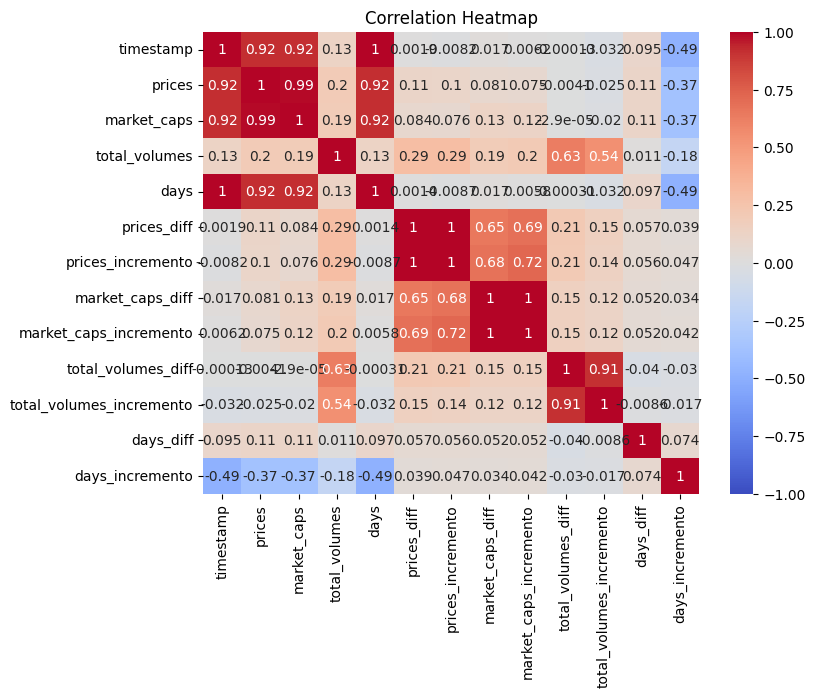

                          timestamp    prices  market_caps  total_volumes  \
timestamp                  1.000000  0.921365     0.921608       0.130286   
prices                     0.921365  1.000000     0.991372       0.199333   
market_caps                0.921608  0.991372     1.000000       0.192615   
total_volumes              0.130286  0.199333     0.192615       1.000000   
days                       0.999962  0.921522     0.921745       0.129515   
prices_diff                0.001938  0.114180     0.083756       0.291824   
prices_incremento         -0.008221  0.102740     0.075561       0.290103   
market_caps_diff           0.017056  0.081363     0.132069       0.193569   
market_caps_incremento     0.006199  0.074616     0.120139       0.204727   
total_volumes_diff        -0.000128 -0.004056    -0.000029       0.628608   
total_volumes_incremento  -0.032118 -0.025329    -0.020499       0.542168   
days_diff                  0.095407  0.111212     0.110677       0.011074   

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = projected_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

In [232]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Obtener los últimos 120 días del DataFrame
# last_120_days = projected_df.tail(120)

# # Crear una figura y ejes para el gráfico de precios
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los precios
# ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# # Calcular la línea de tendencia para los precios
# x = np.arange(len(last_120_days))
# coefficients = np.polyfit(x, last_120_days['prices'], 1)
# trendline = np.polyval(coefficients, x)
# ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# # Configurar las etiquetas y título del gráfico de precios
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# # Ajustar el espaciado de las marcas en el eje x
# num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
# step = len(last_120_days) // (num_ticks - 1)
# xticks = last_120_days['timestamp'][::step]
# ax.set_xticks(xticks)

# # Obtener los máximos y mínimos de los últimos 30 días
# last_30_days = last_120_days.tail(30)
# max_value = last_30_days['prices'].max()
# min_value = last_30_days['prices'].min()

# # Marcar los máximos y mínimos en el origen
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# # Trazar líneas horizontales en los máximos y mínimos
# ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
# ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# # Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
# ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
# ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# # Activar la leyenda del gráfico de precios
# ax.legend()

# # Agregar líneas secundarias para mostrar los cambios diarios
# ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
# ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
# ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# # Mostrar el gráfico de precios
# plt.show()

# # Crear una figura y ejes para el gráfico de market_caps
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los market_caps
# ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# # Calcular la línea de tendencia para los market_caps
# coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
# trendline = np.polyval(coefficients, x)
# ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# # Configurar las etiquetas y título del gráfico de market_caps
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# # Ajustar el espaciado de las marcas en el eje x
# ax.set_xticks(xticks)

# # Obtener los máximos y mínimos de los últimos 30 días
# max_value = last_30_days['market_caps'].max()
# min_value = last_30_days['market_caps'].min()

# # Marcar los máximos y mínimos en el origen
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# # Trazar líneas horizontales en los máximos y mínimos
# ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
# ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# # Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
# ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
# ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# # Activar la leyenda del gráfico de market_caps
# ax.legend()

# # Agregar líneas secundarias para mostrar los cambios diarios
# ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
# ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
# ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# # Mostrar el gráfico de market_caps
# plt.show()

# # Crear una figura y ejes para el gráfico de total_volumes
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los total_volumes
# ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# # Calcular la línea de tendencia para los total_volumes
# coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
# trendline = np.polyval(coefficients, x)
# ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# # Configurar las etiquetas y título del gráfico de total_volumes
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# # Ajustar el espaciado de las marcas en el eje x
# ax.set_xticks(xticks)

# # Obtener los máximos y mínimos de los últimos 30 días
# max_value = last_30_days['total_volumes'].max()
# min_value = last_30_days['total_volumes'].min()

# # Marcar los máximos y mínimos en el origen
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# # Trazar líneas horizontales en los máximos y mínimos
# ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
# ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# # Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
# ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
# ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# # Activar la leyenda del gráfico de total_volumes
# ax.legend()

# # Agregar líneas secundarias para mostrar los cambios diarios
# ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
# ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
# ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# # Mostrar el gráfico de total_volumes
# plt.show()


In [233]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Obtener los últimos 90 valores de los DataFrames
# last_90_prices = projected_df['prices'].tail(90)
# last_90_market_caps = projected_df['market_caps'].tail(90)
# last_90_total_volumes = projected_df['total_volumes'].tail(90)

# # Crear un rango de índices para los últimos 90 valores
# indices = range(len(last_90_prices))

# # Graficar los valores de precios
# plt.scatter(indices, last_90_prices, s=4, label='Prices')

# # Calcular la pendiente de los precios
# slope_prices, _ = np.polyfit(indices, last_90_prices, 1)
# slope_prices_str = '{:.2f}'.format(slope_prices)

# # Graficar la línea de tendencia de los precios
# plt.plot(indices, np.polyval(np.polyfit(indices, last_90_prices, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_prices_str + ')')

# plt.title("Precios de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("Precios")
# plt.legend()
# plt.show()

# # Graficar los valores de market_caps
# plt.scatter(indices, last_90_market_caps, s=4, label='Market Caps')

# # Calcular la pendiente de los market_caps
# slope_market_caps, _ = np.polyfit(indices, last_90_market_caps, 1)
# slope_market_caps_str = '{:.2f}'.format(slope_market_caps)

# # Graficar la línea de tendencia de los market_caps
# plt.plot(indices, np.polyval(np.polyfit(indices, last_90_market_caps, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_market_caps_str + ')')

# plt.title("Market Caps de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("Market Caps")
# plt.legend()
# plt.show()

# # Graficar los valores de total_volumes
# plt.scatter(indices, last_90_total_volumes, s=4, label='Total Volumes')

# # Calcular la pendiente de los total_volumes
# slope_total_volumes, _ = np.polyfit(indices, last_90_total_volumes, 1)
# slope_total_volumes_str = '{:.2f}'.format(slope_total_volumes)

# # Graficar la línea de tendencia de los total_volumes
# plt.plot(indices, np.polyval(np.polyfit(indices, last_90_total_volumes, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_total_volumes_str + ')')

# plt.title("Total Volumes de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("Total Volumes")
# plt.legend()
# plt.show()

__________________________________________

 ____ ______ _____ _____

# Reintento, Nuevo modelo Multilinear regresion

In [234]:
# Opcion 2: - CONECTADA - OK
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Filtrar los últimos 45 días
last_45_days = df_bit[-55:].copy()

# Convertir la columna 'timestamp' al formato de fecha y hora
last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# Dividir los datos en características (X) y variable objetivo (y)
X_prices = last_45_days[['days','market_caps','total_volumes']]
X_market_caps = last_45_days[['days','prices','total_volumes']]
X_total_volumes = last_45_days[['days','prices','market_caps']]

y_prices = last_45_days['prices']
y_market_caps = last_45_days['market_caps']
y_total_volumes = last_45_days['total_volumes']

# Crear un modelo de regresión lineal para cada variable
model_prices = LinearRegression()
model_market_caps = LinearRegression()
model_total_volumes = LinearRegression()

# Ajustar los modelos a los datos de los últimos 45 días
model_prices.fit(X_prices, y_prices)
model_market_caps.fit(X_market_caps, y_market_caps)
model_total_volumes.fit(X_total_volumes, y_total_volumes)

# Generar valores futuros de días para los próximos 30 días
future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 31)})

# Realizar predicciones de precios, market_caps y total_volumes para los próximos 30 días
future_prices = model_prices.predict(future_days)
future_market_caps = model_market_caps.predict(future_days)
future_total_volumes = model_total_volumes.predict(future_days)

# Calcular desviaciones estándar para cada variable
std_prices = 2229.815617/5
std_market_caps = 4.379837e+10/5
std_total_volumes = 3.940256e+09

# Generar ruido gaussiano para cada variable
noise_prices = np.random.normal(0, std_prices, len(future_prices))
noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# Agregar ruido a los valores pronosticados
future_prices += noise_prices
future_market_caps += noise_market_caps
future_total_volumes += noise_total_volumes

# Crear un DataFrame con los valores proyectados y con ruido
projected_data_with_noise = pd.DataFrame({
    'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(1), periods=30, freq='D'),
    'prices': future_prices,
    'market_caps': future_market_caps,
    'total_volumes': future_total_volumes
})

# Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
projected_df = pd.concat([last_45_days, projected_data_with_noise])

# Restablecer los índices
projected_df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
print(projected_df)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- market_caps
- total_volumes


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Filtrar los últimos 45 días
last_45_days = df_bit[-45:].copy()

# Convertir la columna 'timestamp' al formato de fecha y hora
last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

for column in df_bit.columns:

    if column not in last_45_days.columns:
        continue

    # Dividir los datos en características (X) y variable objetivo (y)
    X_train = last_45_days.drop(column, axis=1)
    y_train = last_45_days[column]

    # Crear un modelo de regresión lineal para cada variable
    model = LinearRegression()

    # Ajustar el modelo a los datos de los últimos 45 días
    model.fit(X_train, y_train)

    # Generar valores futuros de días para los próximos 30 días
    future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 31)})

    # Realizar predicciones para los próximos 30 días
    X_test = future_days
    future_values = model.predict(X_test)

    # Calcular desviación estándar para la columna actual
    std_desv = df_bit[column].std()

    # Generar ruido gaussiano para la columna actual
    noise_values = np.random.normal(0, std_desv, len(future_values))

    # Agregar ruido a los valores pronosticados
    future_values += noise_values

    # Concatenar future_values a la columna existente en df_bit
    df_bit[column] = pd.concat([df_bit[column], pd.Series(future_values)], ignore_index=True)

# Mostrar el DataFrame resultante
print(df_bit)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- market_caps
- prices
- total_volumes


_____________________________________________

_____________________________________________

_____________________________________________

_____________________________________________

In [ ]:

#Instalacion e importacion de libreria de Cryptowatch
import logging
!pip install cryptowatch-sdk
import cryptowatch as cw
#API KEY necesaria para utilizacion de la libreria de Cryptowatch
cw.api_key = "GB92DF4UW2QKWFW0ZL7C"

ModuleNotFoundError: No module named 'cryptowatch'

In [ ]:
#Setieamos el nivel del logging de la SDK a Warning para que tire errores (puede cambiarse a DEBUG en desarrollo) 
logging.basicConfig()
logging.getLogger("cryptowatch").setLevel(logging.WARNING)

In [ ]:
#Ver los distintos Exchanges disponibles
cw.exchanges.list()

NameError: name 'cw' is not defined